In [1]:
# import 'Numpy'
import numpy as np

# import 'Pandas' 
import pandas as pd

# display all columns of the dataframe
pd.options.display.max_columns=None

# display all rows of the dataframe
pd.options.display.max_rows=None

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# import variance_inflation_factor from statsmodel to perform multicollinearity analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import train-test,cross validation,gridsearch cv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# importing classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format


# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

#importing pipeline
from sklearn.pipeline import Pipeline

# **DATA PREPERATION**

## Data Understanding

In [2]:
df=pd.read_csv('Loan_dataset_for_model_building.csv')

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Loan_dataset_for_model_building.csv'

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

## Encoding of Categorical Variables

In [ ]:
df1=df.copy()

In [ ]:
df_cat = df1.select_dtypes(include= 'object')

df_cat.columns

In [ ]:
# Dummyencoding
cat_encoded=pd.get_dummies(data=df1[['term','home_ownership','verification_status','initial_list_status']],drop_first= True)

# ordinal encoding
cat_encoded['grade']=df1.grade.map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6})

cat_encoded['sub_grade']=df1.sub_grade.map({'A1':0,'B1':5,'C1':10,'D1':15,'E1':20,'F1':25,'G1':30,
                                                'A2':1,'B2':6,'C2':11,'D2':16,'E2':21,'F2':26,'G2':31,
                                                'A3':2,'B3':7,'C3':12,'D3':17,'E3':22,'F3':27,'G3':32,
                                                'A4':3,'B4':8,'C4':13,'D4':18,'E4':23,'F4':28,'G4':33,
                                                'A5':4,'B5':9,'C5':14,'D5':19,'E5':24,'F5':29,'G5':34})

cat_encoded['emp_length']=df1.emp_length.map({'10+ years':10,'< 1 year':0,'1 year':1,'3 years':3,'8 years':8,'9 years':9,
                                              '4 years':4, '5 years':5, '6 years':6, '2 years':2, '7 years':7})

In [ ]:
cat_encoded.isnull().sum()

In [ ]:
df1.select_dtypes(include=np.object).isnull().sum()

In [ ]:
df1.drop(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'initial_list_status'],axis=1,inplace=True)

df1=pd.concat([df1,cat_encoded],axis=1)

In [ ]:
df1.columns

In [ ]:
df1.isnull().sum()

In [ ]:
df1.to_csv('df1.csv')

**Encoding of categorical variables is done and stored in `df1` dataframe.**

#### Splitting Data into train and test (this is done before preprocessing to avoid data leakage)

In [ ]:
train_rf, test_rf= train_test_split(df1, test_size = 0.30, random_state = 10,stratify=df1['default_ind'])

In [ ]:
# train data shape

print('independent variables train data shape:',train_rf.shape)

# test data shape

print('independent variables test data shape:',test_rf.shape)

**Let us fit preprocessing on train data and then later transform it on train and test dataset**

#### Outlier Analysis & Treatment

In [ ]:
train_rf=train_rf[train_rf['annual_inc']<358000]

train_rf=train_rf[train_rf['delinq_2yrs']<8]

train_rf=train_rf[train_rf['dti']<318]

train_rf=train_rf[train_rf['open_acc']<32]

train_rf=train_rf[train_rf['pub_rec']<13]

train_rf=train_rf[train_rf['revol_util']<101]

train_rf=train_rf[train_rf['total_acc']<65]

train_rf=train_rf[train_rf['int_rate']<25.9]

In [ ]:
test_rf=test_rf[test_rf['annual_inc']<358000]

test_rf=test_rf[test_rf['delinq_2yrs']<8]

test_rf=test_rf[test_rf['dti']<318]

test_rf=test_rf[test_rf['open_acc']<32]

test_rf=test_rf[test_rf['pub_rec']<13]

test_rf=test_rf[test_rf['revol_util']<101]

test_rf=test_rf[test_rf['total_acc']<65]

test_rf=test_rf[test_rf['int_rate']<25.9]

In [ ]:
train_rf.shape

In [ ]:
train_rf.shape

In [ ]:
train_rf['default_ind'].value_counts(normalize=True)

In [ ]:
test_rf.shape

In [ ]:
test_rf.shape

In [ ]:
test_rf['default_ind'].value_counts(normalize=True)

#### Null Value Analysis & Treatment

In [ ]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = train_rf.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (train_rf.isnull().sum()*100/len(train_rf)).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

In [ ]:
# Drop rows for the variables having less than 6% missing values
train_rf=train_rf.dropna(axis=0, subset= ['emp_length'])

test_rf=test_rf.dropna(axis=0, subset= ['emp_length'])

In [ ]:
# check for skewness of the columns with missing values

print('Skewness of   total_rev_hi_lim    :',train_rf.total_rev_hi_lim.skew())
print('Skewness of   tot_cur_bal         :',train_rf.tot_cur_bal.skew())
print('Skewness of   tot_coll_amt        :',train_rf.tot_coll_amt.skew())

In [ ]:
median_total_rev_hi_lim=train_rf.total_rev_hi_lim.median()

median_tot_cur_bal=train_rf.tot_cur_bal.median()

median_tot_coll_amt=train_rf.tot_coll_amt.median()

In [ ]:
# Imputing Median values for train data

train_rf.total_rev_hi_lim =train_rf.total_rev_hi_lim.fillna(median_total_rev_hi_lim)

train_rf.tot_cur_bal =train_rf.tot_cur_bal.fillna(median_tot_cur_bal)

train_rf.tot_coll_amt =train_rf.tot_coll_amt.fillna(median_tot_coll_amt)


# Imputing Median values for test data

test_rf.total_rev_hi_lim =test_rf.total_rev_hi_lim.fillna(median_total_rev_hi_lim)

test_rf.tot_cur_bal =test_rf.tot_cur_bal.fillna(median_tot_cur_bal)

test_rf.tot_coll_amt =test_rf.tot_coll_amt.fillna(median_tot_coll_amt)


In [ ]:
train_rf.isnull().sum().sum()

In [ ]:
test_rf.isnull().sum().sum()

## Checking for duplicates

In [ ]:
train_rf.duplicated().sum()

In [ ]:
test_rf.duplicated().sum()

In [ ]:
train_rf.to_csv('train_rf.csv')

In [ ]:
test_rf.to_csv('test_rf.csv')

## Feature Engg

In [ ]:
train_rf=pd.read_csv('train_rf.csv')

test_rf=pd.read_csv('test_rf.csv')

In [ ]:
train_rf.drop('Unnamed: 0',axis=1,inplace=True)

test_rf.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
train_rf.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,grade,sub_grade,emp_length
0,17325,12.120000,40000.000000,31.410000,0,0,10,0,32236,77.700000,14,0,100408,41500,0,0,1,0,0,0,0,0,1,1,1,7,10
1,35000,23.990000,160000.000000,12.480000,0,2,15,1,14600,42.200000,36,0,78073,34600,0,0,1,0,0,0,0,1,0,0,5,26,2
2,10000,12.120000,60000.000000,7.580000,2,0,8,0,39414,49.800000,32,0,82421,23900,0,0,0,0,0,0,1,0,1,0,1,7,5
3,10000,13.220000,35000.000000,8.090000,0,0,7,0,8907,61.900000,7,0,82421,23900,0,0,0,0,0,0,1,0,0,0,2,11,3
4,35000,23.400000,100000.000000,31.690000,2,0,10,0,31528,82.700000,31,0,74319,61200,0,1,0,0,0,0,1,0,1,0,4,24,10


In [ ]:
train_rf.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind', 'term_ 60 months', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'initial_list_status_w', 'grade',
       'sub_grade', 'emp_length'],
      dtype='object')

In [ ]:
train_rf=np.sqrt(train_rf)

test_rf=np.sqrt(test_rf)

In [ ]:
train_rf[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 
          'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]=np.log(train_rf[['loan_amnt', 'int_rate', 'annual_inc', 'dti',
        'revol_bal', 'revol_util', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]+1)

test_rf[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 
          'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]=np.log(test_rf[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 
          'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',]]+1)

In [ ]:
test_rf.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,grade,sub_grade,emp_length
0,29475,18.490000,126000.000000,29.300000,1,0,17,0,13885,34.300000,29,148.000000,95616.000000,45300.000000,0,1,0,0,0,0,1,0,1,0,4,21,10.000000
1,11775,22.150000,57000.000000,24.720000,0,0,10,1,2866,61.000000,27,317.000000,45067.000000,4700.000000,0,0,1,0,0,0,0,1,0,0,4,24,10.000000
2,13550,17.140000,40000.000000,24.070000,0,1,10,0,22501,97.000000,14,0.000000,22501.000000,23200.000000,1,0,0,0,0,0,1,0,1,0,3,18,2.000000
3,16950,21.980000,38000.000000,31.980000,1,1,12,0,11900,70.400000,39,0.000000,30242.000000,16900.000000,0,1,0,0,0,0,1,0,1,0,4,23,4.000000
4,12000,15.310000,90000.000000,11.150000,0,1,9,0,18078,74.400000,14,0.000000,44731.000000,24300.000000,0,1,0,0,0,0,1,1,0,1,2,13,6.000000


In [ ]:
train_rf.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind', 'term_ 60 months', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'initial_list_status_w', 'grade',
       'sub_grade', 'emp_length'],
      dtype='object')

In [ ]:
train_rf['nf1']=train_rf['delinq_2yrs']+train_rf['inq_last_6mths']

test_rf['nf1']=test_rf['delinq_2yrs']+test_rf['inq_last_6mths']

train_rf['nf2']=train_rf['pub_rec']+train_rf['inq_last_6mths']

test_rf['nf2']=test_rf['pub_rec']+test_rf['inq_last_6mths']

In [ ]:
test_rf.drop(['delinq_2yrs','pub_rec'],axis=1,inplace=True)

In [ ]:
train_rf.drop(['delinq_2yrs','pub_rec'],axis=1,inplace=True)

# **MODEL BUILDING**

# Random Forest Model

### Tune the Hyperparameters (Random Forest)

In [ ]:
RF_be=[]

RF_ve=[]

for i in [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]: 
  RF=RandomForestClassifier(criterion='entropy',n_estimators=i,random_state=10,class_weight='balanced')
  kf=KFold(n_splits=3,shuffle=True,random_state=10)
  scores=cross_val_score(RF,X_train_rf,y_train_rf,cv=kf,n_jobs=-1,scoring='recall')
  RF_be.append(np.mean(1-scores))
  RF_ve.append(np.std(scores,ddof=1))

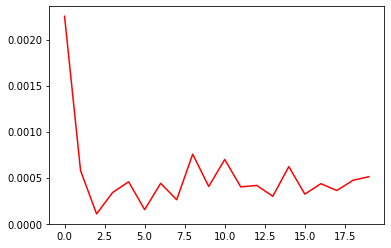

In [ ]:
x_axis=np.arange(len(RF_ve))
plt.plot(x_axis,RF_ve,color='r',label='RF_ve')

In [ ]:
x_axis1=np.arange(len(RF_ve))
plt.plot(x_axis1,RF_be,color='b',label='RF_be')

In [ ]:
RF_be

[0.964984762975971,
 0.9899523630634463,
 0.9884375419059968,
 0.993840278844259,
 0.9932136699332145,
 0.9951246474170216,
 0.9945980281718501,
 0.9962447584128024,
 0.995519302165787,
 0.9966725499785856,
 0.9960463969136607,
 0.9968372634016869,
 0.9965737455126237,
 0.9969363449321645,
 0.9965407945908981,
 0.9972656055396576,
 0.9969361071808135,
 0.9971337715256405,
 0.9968042928233788,
 0.9971665990786654]

In [ ]:
scores

array([0.00227004, 0.00296413, 0.00326603])

In [ ]:
np.argmin(RF_be),np.min(RF_be)

(0, 0.964984762975971)

In [ ]:
RF_ve

In [ ]:
RF_be

In [ ]:
np.argmin(RF_ve),np.min(RF_ve)

(2, 0.00010606672564554655)

In [ ]:
scores

In [ ]:
RF=RandomForestClassifier(criterion='entropy',random_state = 10,class_weight='balanced',max_depth=8)
params={'n_estimators':np.arange(1,100)}
kf=KFold(n_splits=3,shuffle=True,random_state=10)
GS1=GridSearchCV(RF,params,cv=kf,n_jobs=-1,scoring='recall')
GS1.fit(X_train_rf,y_train_rf)

GridSearchCV(cv=KFold(n_splits=3, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy', max_depth=8,
                                              random_state=10),
             n_jobs=-1,
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='recall')

In [ ]:
GS1.best_score_

0.7536359438285433

In [ ]:
GS1.best_params_

{'n_estimators': 4}

In [ ]:
GS1.cv_results_['std_test_score']

array([0.03703247, 0.01857497, 0.01150344, 0.00580925, 0.00597901,
       0.00886166, 0.00557186, 0.00882621, 0.00903154, 0.0105514 ,
       0.01051021, 0.00893326, 0.00521733, 0.00554154, 0.00203222,
       0.0015757 , 0.00276599, 0.00463184, 0.00416113, 0.00287743,
       0.00407672, 0.00473652, 0.00430027, 0.00468594, 0.00468163,
       0.00471409, 0.00502049, 0.00327544, 0.00451222, 0.00475487,
       0.00560157, 0.0053565 , 0.0068315 , 0.00600778, 0.00691957,
       0.00706239, 0.00611381, 0.00596732, 0.00554958, 0.0050959 ,
       0.00442224, 0.00480471, 0.00511754, 0.00451445, 0.00443095,
       0.004844  , 0.00479283, 0.00411576, 0.00412343, 0.00374574,
       0.00398625, 0.00390413, 0.00366368, 0.00378467, 0.00342411,
       0.00307562, 0.00366372, 0.00275231, 0.00281498, 0.00337971,
       0.00346004, 0.00347658, 0.00334789, 0.00397235, 0.00428018,
       0.00447684, 0.00419474, 0.00412278, 0.00370487, 0.00347942,
       0.00326647, 0.00348097, 0.00367778, 0.00376544, 0.00353

In [ ]:
dir(GS1)

In [ ]:
train_rf.columns

### Important features from RFE 

In [ ]:
X_train_rf=train_rf[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths',
       'tot_cur_bal', 'total_rev_hi_lim', 'initial_list_status_w', 'grade',
       'sub_grade']]

y_train_rf=train_rf['default_ind']

X_test_rf=test_rf[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths',
       'tot_cur_bal', 'total_rev_hi_lim', 'initial_list_status_w', 'grade',
       'sub_grade']]

y_test_rf=test_rf['default_ind']

In [ ]:
rf_classification = RandomForestClassifier(criterion='entropy',random_state = 10,class_weight='balanced',max_depth=8,n_estimators=16)

rf_model = rf_classification.fit(X_train_rf,y_train_rf)

In [ ]:
rf_model.feature_importances_

array([0.43811925, 0.03433799, 0.01767958, 0.01357205, 0.0807667 ,
       0.07691195, 0.13369341, 0.0711291 , 0.13378996])

### Performance of the final RF model

**Calculate performance measures on the train set.**

In [ ]:
y_train_rf_pred =rf_model.predict(X_train_rf)

    
print(classification_report(y_true=y_train_rf,y_pred=y_train_rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80    528457
           1       0.12      0.77      0.21     30357

    accuracy                           0.68    558814
   macro avg       0.55      0.72      0.50    558814
weighted avg       0.93      0.68      0.77    558814



**Calculate performance measures on the test set.**

In [ ]:
y_test_rf_pred =rf_model.predict(X_test_rf)

    
print(classification_report(y_true=y_test_rf,y_pred=y_test_rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80    226502
           1       0.12      0.76      0.20     12943

    accuracy                           0.68    239445
   macro avg       0.55      0.72      0.50    239445
weighted avg       0.93      0.68      0.77    239445



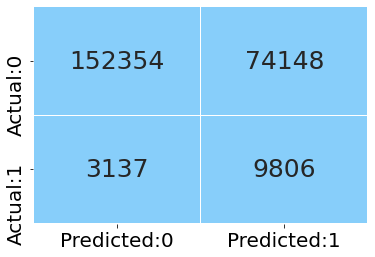

In [ ]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test_rf,y_test_rf_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

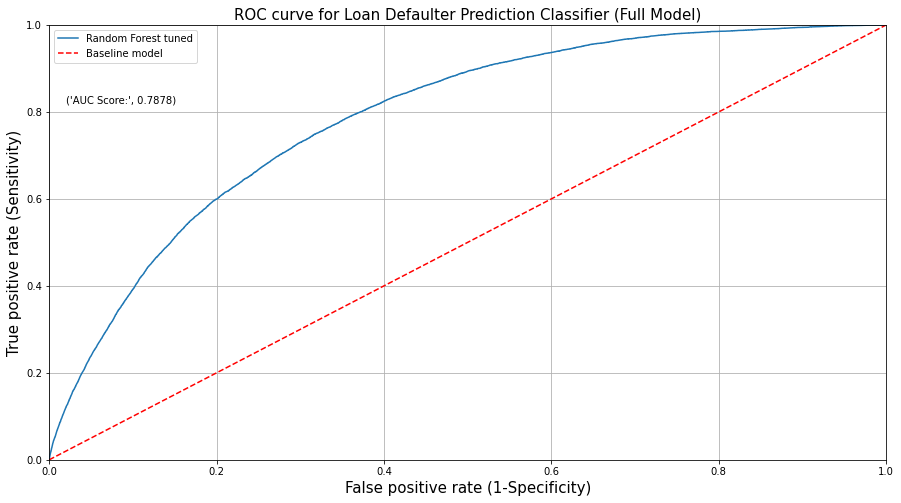

In [ ]:
# Roc curve

plt.figure(figsize=[15,8])

y_test_rf_pred_proba = rf_model.predict_proba(X_test_rf)[:,1]


# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test_rf,y_test_rf_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr,label='Random Forest tuned')

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--',label='Baseline model')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(metrics.roc_auc_score(y_test_rf,y_test_rf_pred_proba),4)))
                               
# plot the grid
plt.grid(True)

# displaying legends
plt.legend()

plt.show()

In [ ]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.748281,0.316408,0.506520,0.431873
1,0.748281,0.316412,0.506519,0.431869
2,0.748281,0.316425,0.506514,0.431855
3,0.748281,0.316452,0.506514,0.431829
4,0.748281,0.316456,0.506512,0.431825


In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_test_rf_pred_youden = [ 0 if x < 0.506520 else 1 for x in y_test_rf_pred_proba]

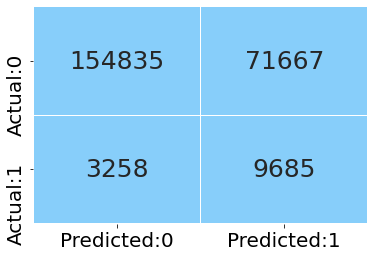

In [ ]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test_rf,y_test_rf_pred_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [ ]:
print(classification_report(y_true=y_test_rf,y_pred=y_test_rf_pred_youden))

              precision    recall  f1-score   support

           0       0.98      0.68      0.81    226502
           1       0.12      0.75      0.21     12943

    accuracy                           0.69    239445
   macro avg       0.55      0.72      0.51    239445
weighted avg       0.93      0.69      0.77    239445



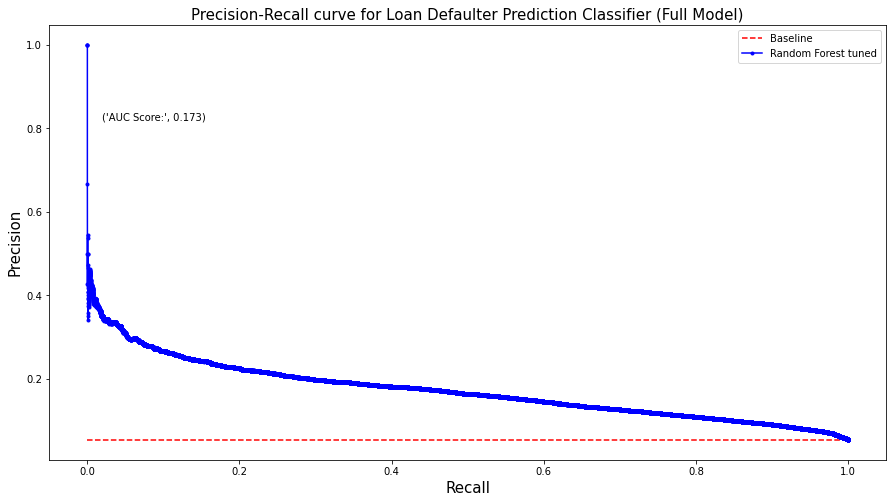

In [ ]:
# precision recall curve

plt.figure(figsize=[15,8])

lr_precision, lr_recall, threshold = precision_recall_curve(y_test_rf,y_test_rf_pred_proba)

lr_f1, lr_auc = f1_score(y_test_rf,y_test_rf_pred), auc(lr_recall, lr_precision)

# summarize scores
#print('Random Forest tuned: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
Baseline = len(y_test_rf[y_test_rf==1]) / len(y_test_rf)

plt.plot([0, 1], [Baseline,Baseline], linestyle='--', label='Baseline',color='r')

plt.plot(lr_recall, lr_precision, marker='.', label='Random Forest tuned',color='b')

#average_precision = average_precision_score(y_test, y_pred_test_proba_GN)

#print('Average precision-recall score:'
#      ,average_precision)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the average precision score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(lr_auc,4)))

# axis labels
plt.title('Precision-Recall curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('Recall',fontsize = 15)
plt.ylabel('Precision',fontsize = 15)

# show the legend
plt.legend()

# show the plot
plt.show()

# Logistic Regression

### Tune the Hyperparameters (Logistic Regression) 

In [ ]:
lr=LogisticRegression(class_weight='balanced',random_state=10)
params = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
          'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
kf=KFold(n_splits=3,shuffle=True,random_state=10)
GS=GridSearchCV(lr,params,cv=kf,n_jobs=-1,scoring='recall')
GS.fit(X_train_lr,y_train_lr)

GridSearchCV(cv=KFold(n_splits=3, random_state=10, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=10),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='recall')

In [ ]:
GS.best_params_

{'C': 0.7, 'penalty': 'l2'}

In [ ]:
GS.best_score_

0.6891610881750788

### Important features from RFE

In [ ]:
X_train_lr=train_rf[['int_rate', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'grade', 'sub_grade', 'emp_length']]

y_train_lr=train_rf['default_ind']

X_test_lr=test_rf[['int_rate', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'grade', 'sub_grade', 'emp_length']]

y_test_lr=test_rf['default_ind']

### Performance of the final LR model

In [ ]:
lr_model = LogisticRegression(class_weight='balanced',random_state=10,C=0.7,penalty='l2')
lr_model.fit(X_train_lr,y_train_lr)

LogisticRegression(C=0.7, class_weight='balanced', random_state=10)

In [ ]:
y_train_lr_pred =lr_model.predict(X_train_lr)

    
print(classification_report(y_true=y_train_lr,y_pred=y_train_lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81    528457
           1       0.11      0.69      0.20     30357

    accuracy                           0.69    558814
   macro avg       0.54      0.69      0.50    558814
weighted avg       0.93      0.69      0.78    558814



In [ ]:
y_test_lr_pred =lr_model.predict(X_test_lr)

    
print(classification_report(y_true=y_test_lr,y_pred=y_test_lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81    226502
           1       0.11      0.69      0.19     12943

    accuracy                           0.69    239445
   macro avg       0.54      0.69      0.50    239445
weighted avg       0.93      0.69      0.78    239445



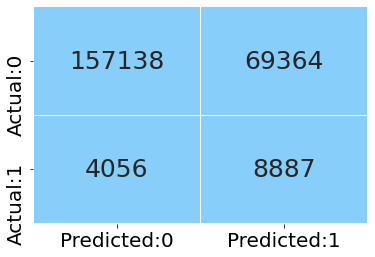

In [ ]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test_lr,y_test_lr_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

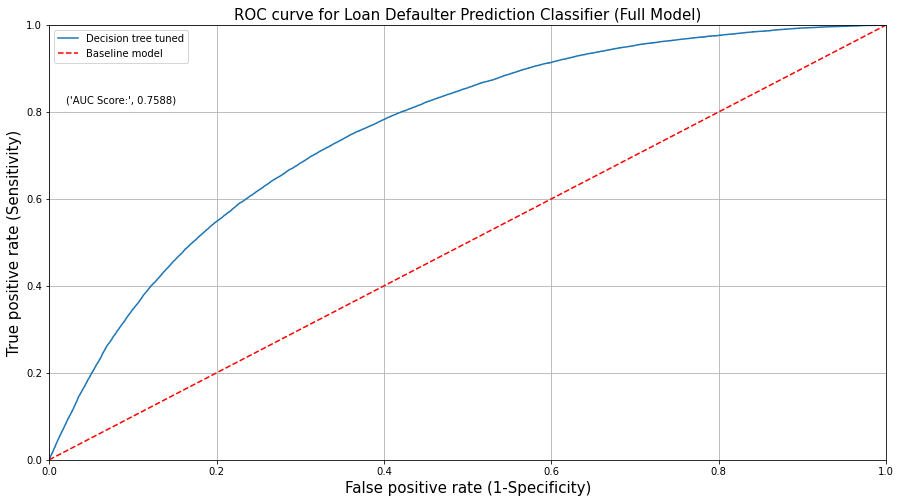

In [ ]:
# Roc curve for train set

plt.figure(figsize=[15,8])

y_train_lr_pred_proba = lr_model.predict_proba(X_train_lr)[:,1]


# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_train_lr,y_train_lr_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr,label='Decision tree tuned')

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--',label='Baseline model')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(metrics.roc_auc_score(y_train_lr,y_train_lr_pred_proba),4)))
                               
# plot the grid
plt.grid(True)

# displaying legends
plt.legend()

plt.show()

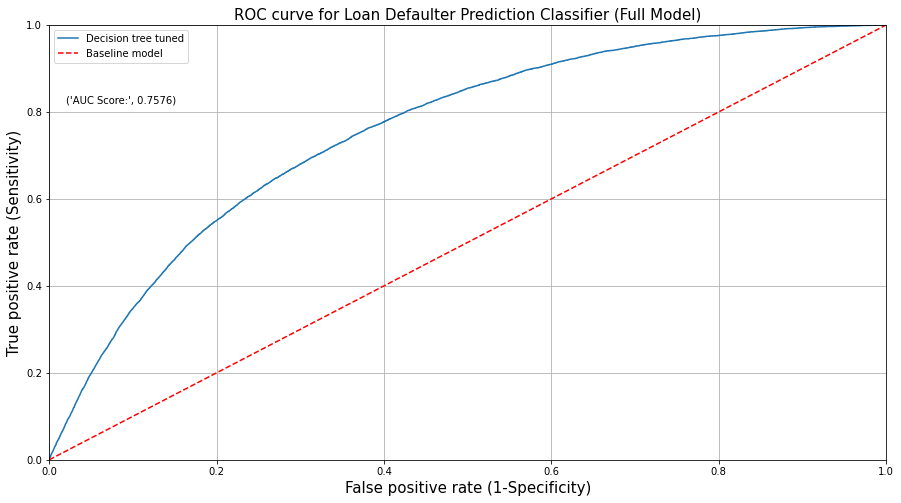

In [ ]:
# Roc curve for test set

plt.figure(figsize=[15,8])

y_test_lr_pred_proba = lr_model.predict_proba(X_test_lr)[:,1]


# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test_lr,y_test_lr_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr,label='Decision tree tuned')

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--',label='Baseline model')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(metrics.roc_auc_score(y_test_lr,y_test_lr_pred_proba),4)))
                               
# plot the grid
plt.grid(True)

# displaying legends
plt.legend()

plt.show()

In [ ]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.744341,0.362032,0.456688,0.382308
1,0.744341,0.362067,0.456670,0.382273
2,0.744341,0.362076,0.456670,0.382264
3,0.744418,0.362160,0.456628,0.382258
4,0.744341,0.362103,0.456661,0.382238


In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_test_lr_pred_youden = [ 0 if x <0.456688 else 1 for x in y_test_lr_pred_proba]

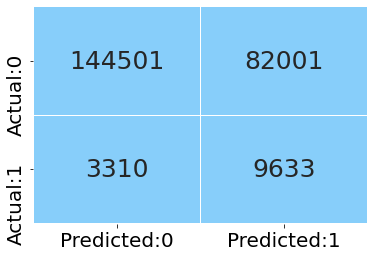

In [ ]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test_lr,y_test_lr_pred_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [ ]:
print(classification_report(y_true=y_test_lr,y_pred=y_test_lr_pred_youden))

              precision    recall  f1-score   support

           0       0.98      0.64      0.77    226502
           1       0.11      0.74      0.18     12943

    accuracy                           0.64    239445
   macro avg       0.54      0.69      0.48    239445
weighted avg       0.93      0.64      0.74    239445



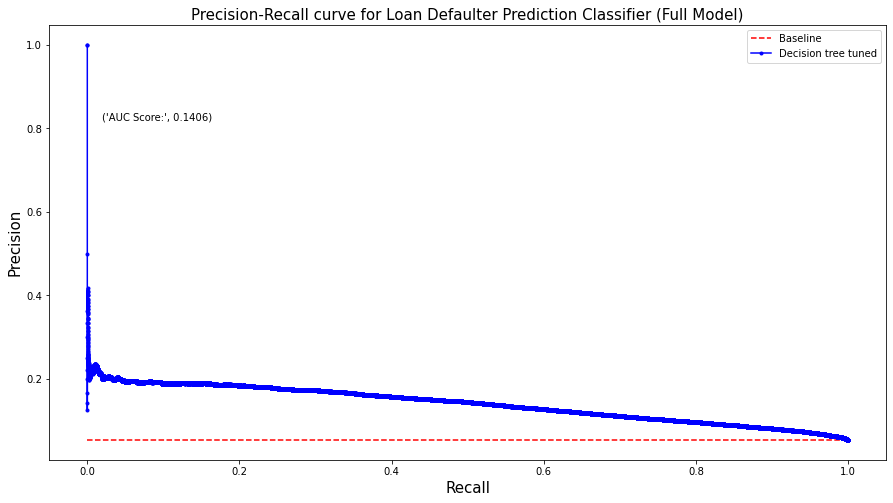

In [ ]:
# precision recall curve

plt.figure(figsize=[15,8])

lr_precision, lr_recall, threshold = precision_recall_curve(y_test_lr,y_test_lr_pred_proba)

lr_f1, lr_auc = f1_score(y_test_lr,y_test_lr_pred), auc(lr_recall, lr_precision)

# summarize scores
#print('Random Forest tuned: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
Baseline = len(y_test_lr[y_test_lr==1]) / len(y_test_lr)

plt.plot([0, 1], [Baseline,Baseline], linestyle='--', label='Baseline',color='r')

plt.plot(lr_recall, lr_precision, marker='.', label='Decision tree tuned',color='b')

#average_precision = average_precision_score(y_test, y_pred_test_proba_GN)

#print('Average precision-recall score:'
#      ,average_precision)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the average precision score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(lr_auc,4)))

# axis labels
plt.title('Precision-Recall curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('Recall',fontsize = 15)
plt.ylabel('Precision',fontsize = 15)

# show the legend
plt.legend()

# show the plot
plt.show()

# Decision Tree

### Tune the Hyperparameters (Decision Tree)

In [ ]:
## Tune the Hyperparameters (Decision Tree)

In [2]:
train=pd.read_csv('train_isd.csv')
train.drop('Unnamed: 0',axis=1,inplace=True)
train.drop('issue_d',axis=1,inplace=True)

In [3]:
test=pd.read_csv('test_isd.csv')
test.drop('Unnamed: 0',axis=1,inplace=True)
test.drop('issue_d',axis=1,inplace=True)

In [4]:
X_train_dt=train.drop('default_ind',axis=1)
y_train_dt=train['default_ind']

In [5]:
X_test_dt=test.drop('default_ind',axis=1)
y_test_dt=test['default_ind']

In [32]:
DT=DecisionTreeClassifier(random_state = 10,class_weight='balanced',criterion='gini')
params={'max_depth':np.arange(1,44)}
kf=KFold(n_splits=3,shuffle=True,random_state=10)
GS=GridSearchCV(DT,params,cv=kf,n_jobs=-1,scoring='recall')
GS.fit(X_train_dt,y_train_dt)

GridSearchCV(cv=KFold(n_splits=3, random_state=10, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43])},
             scoring='recall')

In [33]:
GS.best_params_

{'max_depth': 1}

### Important features from RFE 

In [ ]:
X_train_dt=train_rf[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal','tot_cur_bal', 'total_rev_hi_lim', 'initial_list_status_w', 'grade','sub_grade']]

y_train_dt=train_rf['default_ind']

X_test_dt=test_rf[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal','tot_cur_bal', 'total_rev_hi_lim', 'initial_list_status_w', 'grade','sub_grade']]

y_test_dt=test_rf['default_ind']

In [ ]:
ss= StandardScaler()

ss.fit(X_train_dt)

X_train_dt= pd.DataFrame(data=ss.transform(X_train_dt),columns=X_train_dt.columns)

X_test_dt= pd.DataFrame(data=ss.transform(X_test_dt),columns=X_test_dt.columns)

### Performance of the final DT model

In [43]:
decision_tree_classification = DecisionTreeClassifier(random_state = 10,class_weight='balanced',criterion='gini',max_depth=2)

decision_tree = decision_tree_classification.fit(X_train_dt,y_train_dt)

In [13]:
decision_tree.get_depth()

1

**Calculate performance measures on the train set.**

In [44]:
y_train_dt_pred =decision_tree.predict(X_train_dt)

    
print(classification_report(y_true=y_train_dt,y_pred=y_train_dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    525815
           1       0.47      0.97      0.64     44723

    accuracy                           0.91    570538
   macro avg       0.74      0.94      0.79    570538
weighted avg       0.96      0.91      0.93    570538



**Calculate performance measures on the test set.**

In [45]:
y_test_dt_pred =decision_tree.predict(X_test_dt)

    
print(classification_report(y_true=y_test_dt,y_pred=y_test_dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    242709
           1       0.36      0.79      0.49       291

    accuracy                           1.00    243000
   macro avg       0.68      0.90      0.74    243000
weighted avg       1.00      1.00      1.00    243000



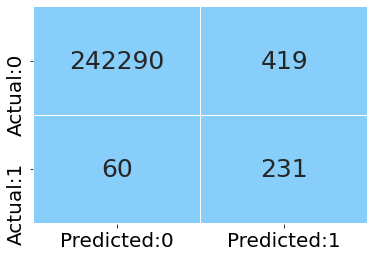

In [46]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test_dt,y_test_dt_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

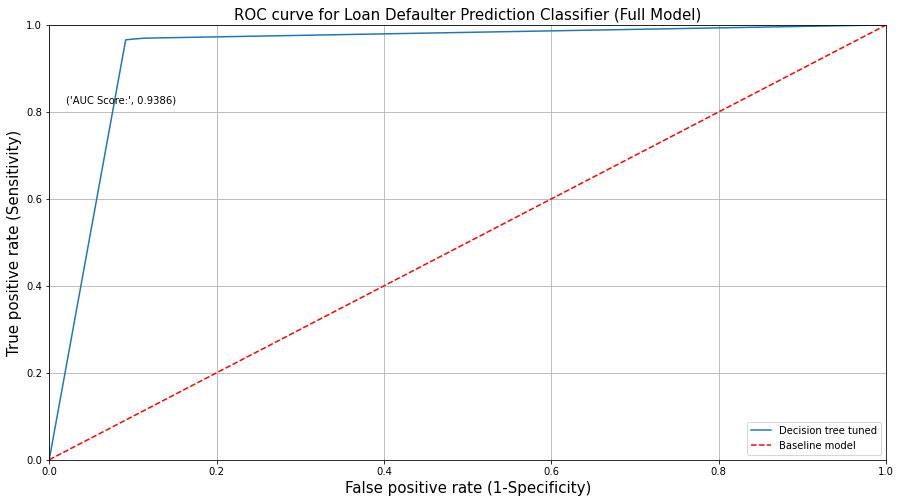

In [47]:
# Roc curve for train set

plt.figure(figsize=[15,8])

y_train_dt_pred_proba = decision_tree.predict_proba(X_train_dt)[:,1]


# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_train_dt,y_train_dt_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr,label='Decision tree tuned')

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--',label='Baseline model')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(metrics.roc_auc_score(y_train_dt,y_train_dt_pred_proba),4)))
                               
# plot the grid
plt.grid(True)

# displaying legends
plt.legend()

plt.show()

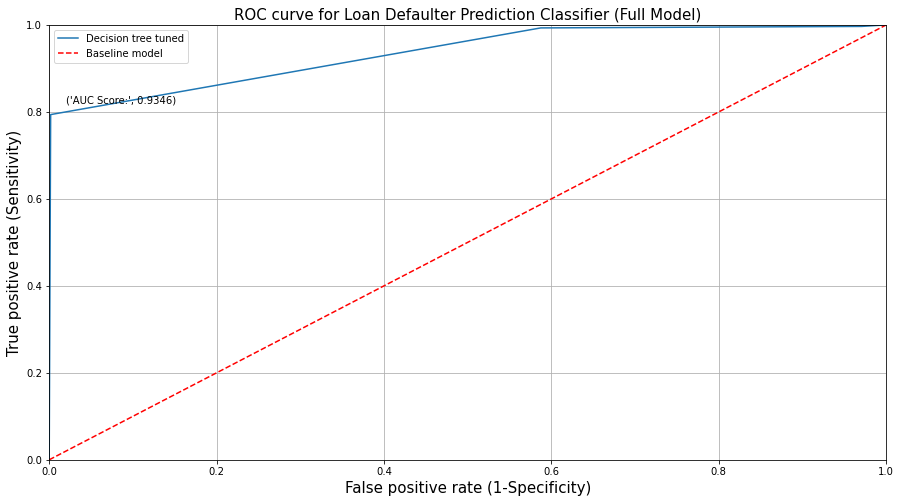

In [48]:
# Roc curve for test set

plt.figure(figsize=[15,8])

y_test_dt_pred_proba = decision_tree.predict_proba(X_test_dt)[:,1]


# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test_dt,y_test_dt_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr,label='Decision tree tuned')

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--',label='Baseline model')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(metrics.roc_auc_score(y_test_dt,y_test_dt_pred_proba),4)))
                               
# plot the grid
plt.grid(True)

# displaying legends
plt.legend()

plt.show()

In [49]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.793814,0.001726,0.913550,0.792088
1,0.993127,0.587267,0.147847,0.405860
2,0.996564,0.970590,0.033372,0.025973
3,0.000000,0.000000,1.913550,0.000000
4,1.000000,1.000000,0.032843,0.000000


In [ ]:
y_test_dt_pred_proba

In [50]:
# convert probabilities to 0 and 1 using 'if_else'
y_test_dt_pred_youden = [ 0 if x < 0.91355 else 1 for x in y_test_dt_pred_proba]

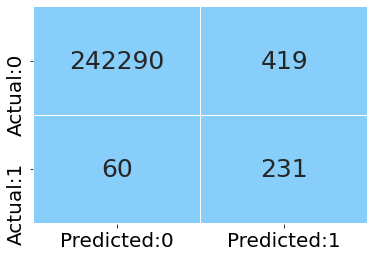

In [51]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test_dt,y_test_dt_pred_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [52]:
print(classification_report(y_true=y_test_dt,y_pred=y_test_dt_pred_youden))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    242709
           1       0.36      0.79      0.49       291

    accuracy                           1.00    243000
   macro avg       0.68      0.90      0.74    243000
weighted avg       1.00      1.00      1.00    243000



In [53]:
train['default_ind'].value_counts(normalize=True)

0   0.921613
1   0.078387
Name: default_ind, dtype: float64

In [54]:
test['default_ind'].value_counts(normalize=True)

0   0.998802
1   0.001198
Name: default_ind, dtype: float64

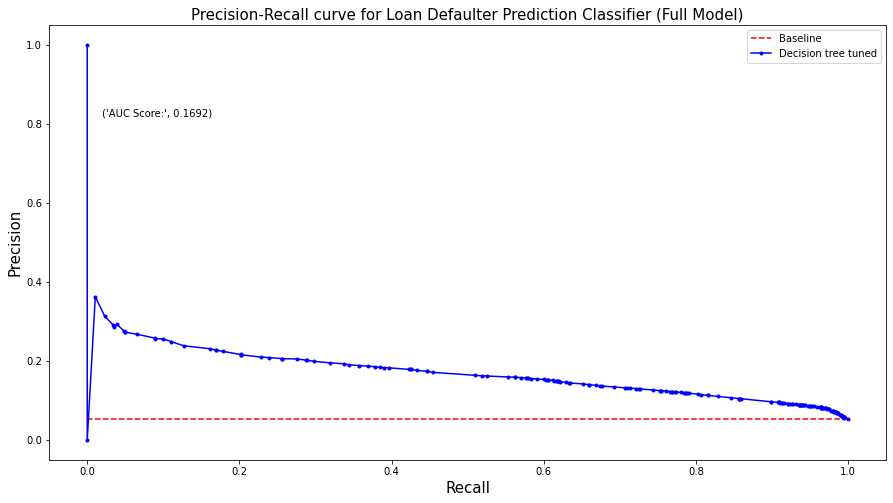

In [ ]:
# precision recall curve

plt.figure(figsize=[15,8])

lr_precision, lr_recall, threshold = precision_recall_curve(y_test_dt,y_test_dt_pred_proba)

lr_f1, lr_auc = f1_score(y_test_dt,y_test_dt_pred), auc(lr_recall, lr_precision)

# summarize scores
#print('Random Forest tuned: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
Baseline = len(y_test_dt[y_test_dt==1]) / len(y_test_dt)

plt.plot([0, 1], [Baseline,Baseline], linestyle='--', label='Baseline',color='r')

plt.plot(lr_recall, lr_precision, marker='.', label='Decision tree tuned',color='b')

#average_precision = average_precision_score(y_test, y_pred_test_proba_GN)

#print('Average precision-recall score:'
#      ,average_precision)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the average precision score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(lr_auc,4)))

# axis labels
plt.title('Precision-Recall curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('Recall',fontsize = 15)
plt.ylabel('Precision',fontsize = 15)

# show the legend
plt.legend()

# show the plot
plt.show()

# Light GBM

### Important features from RFE 

In [ ]:
!pip3 install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
X_train_lg=train_rf[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal','tot_cur_bal', 'total_rev_hi_lim', 'initial_list_status_w', 'grade','sub_grade']]

y_train_lg=train_rf['default_ind']

X_test_lg=test_rf[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal','tot_cur_bal', 'total_rev_hi_lim', 'initial_list_status_w', 'grade','sub_grade']]

y_test_lg=test_rf['default_ind']

In [ ]:
ss= StandardScaler()

ss.fit(X_train_lg)

X_train_lg= pd.DataFrame(data=ss.transform(X_train_lg),columns=X_train_lg.columns)

X_test_lg= pd.DataFrame(data=ss.transform(X_test_lg),columns=X_test_lg.columns)

### Performance of the final LGBM model

In [ ]:
model = lgb.LGBMClassifier(random_state=10,class_weight='balanced', learning_rate= 0.1)
model.fit(X_train_lg,y_train_lg)

LGBMClassifier(class_weight='balanced', random_state=10)

In [ ]:
y_train_lg_pred =model.predict(X_train_lg)

    
print(classification_report(y_true=y_train_lg,y_pred=y_train_lg_pred))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81    528457
           1       0.13      0.81      0.23     30357

    accuracy                           0.70    558814
   macro avg       0.56      0.75      0.52    558814
weighted avg       0.94      0.70      0.78    558814



In [ ]:
y_test_lg_pred =model.predict(X_test_lg)

    
print(classification_report(y_true=y_test_lg,y_pred=y_test_lg_pred))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81    226502
           1       0.13      0.80      0.22     12943

    accuracy                           0.70    239445
   macro avg       0.56      0.74      0.52    239445
weighted avg       0.94      0.70      0.78    239445



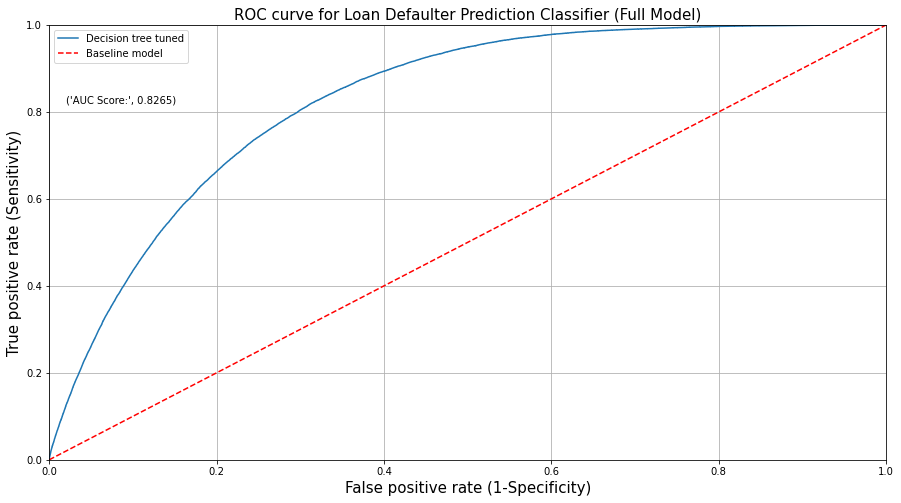

In [ ]:
# Roc curve for train

plt.figure(figsize=[15,8])

y_train_lg_pred_proba = model.predict_proba(X_train_lg)[:,1]


# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_train_lg,y_train_lg_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr,label='Decision tree tuned')

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--',label='Baseline model')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(metrics.roc_auc_score(y_train_lg,y_train_lg_pred_proba),4)))
                               
# plot the grid
plt.grid(True)

# displaying legends
plt.legend()

plt.show()

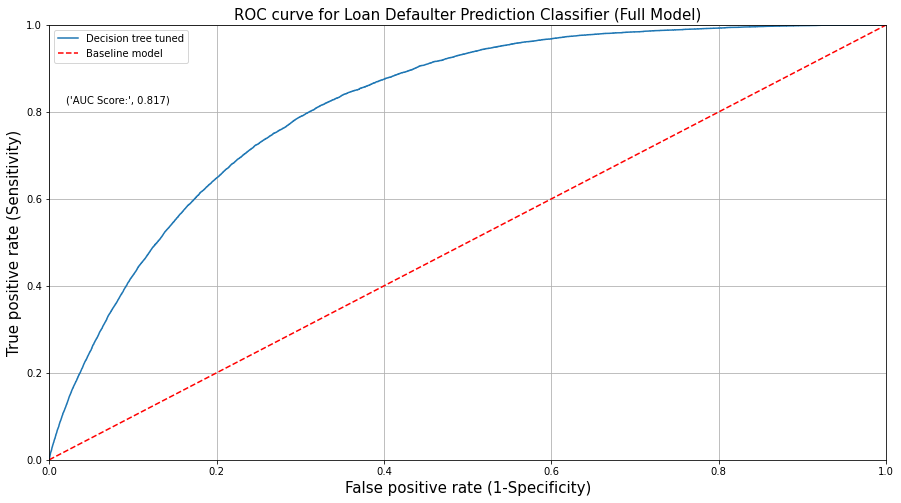

In [ ]:
# Roc curve

plt.figure(figsize=[15,8])

y_test_lg_pred_proba = model.predict_proba(X_test_lg)[:,1]


# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test_lg,y_test_lg_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr,label='Decision tree tuned')

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--',label='Baseline model')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(metrics.roc_auc_score(y_test_lg,y_test_lg_pred_proba),4)))
                               
# plot the grid
plt.grid(True)

# displaying legends
plt.legend()

plt.show()

In [ ]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.814031,0.323556,0.485416,0.490475
1,0.815808,0.325379,0.483757,0.490429
2,0.815112,0.324690,0.484377,0.490422
3,0.813953,0.323538,0.485430,0.490416
4,0.814031,0.323622,0.485369,0.490409


In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_test_lg_pred_youden = [ 0 if x < 0.485416 else 1 for x in y_test_lg_pred_proba]

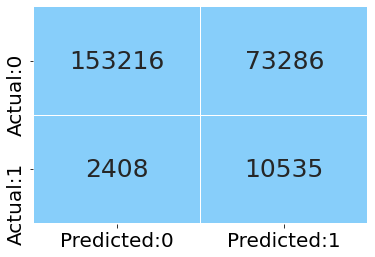

In [ ]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test_lg,y_test_lg_pred_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [ ]:
print(classification_report(y_true=y_test_lg,y_pred=y_test_lg_pred_youden))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80    226502
           1       0.13      0.81      0.22     12943

    accuracy                           0.68    239445
   macro avg       0.56      0.75      0.51    239445
weighted avg       0.94      0.68      0.77    239445



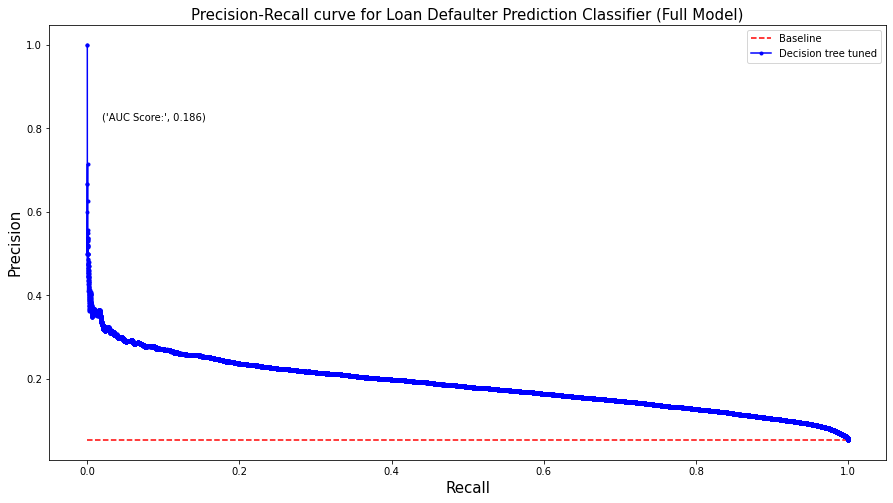

In [ ]:
# precision recall curve

plt.figure(figsize=[15,8])

lr_precision, lr_recall, threshold = precision_recall_curve(y_test_lg,y_test_lg_pred_proba)

lr_f1, lr_auc = f1_score(y_test_lg,y_test_lg_pred), auc(lr_recall, lr_precision)

# summarize scores
#print('Random Forest tuned: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
Baseline = len(y_test_lg[y_test_lg==1]) / len(y_test_lg)

plt.plot([0, 1], [Baseline,Baseline], linestyle='--', label='Baseline',color='r')

plt.plot(lr_recall, lr_precision, marker='.', label='Decision tree tuned',color='b')

#average_precision = average_precision_score(y_test, y_pred_test_proba_GN)

#print('Average precision-recall score:'
#      ,average_precision)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the average precision score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(lr_auc,4)))

# axis labels
plt.title('Precision-Recall curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('Recall',fontsize = 15)
plt.ylabel('Precision',fontsize = 15)

# show the legend
plt.legend()

# show the plot
plt.show()

# Naive Bayes

### Base NB Model

In [ ]:
nb=NB().fit(X_train_scaled, y_train_scaled)
print(confusion_matrix(y_test_scaled,nb.predict(X_test_scaled)))
print(classification_report(y_train_scaled,nb.predict(X_train_scaled)))
print(classification_report(y_test_scaled,nb.predict(X_test_scaled)))

[[220523   5979]
 [ 11582   1361]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    528457
           1       0.18      0.11      0.13     30357

    accuracy                           0.93    558814
   macro avg       0.57      0.54      0.55    558814
weighted avg       0.91      0.93      0.92    558814

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    226502
           1       0.19      0.11      0.13     12943

    accuracy                           0.93    239445
   macro avg       0.57      0.54      0.55    239445
weighted avg       0.91      0.93      0.92    239445



### Finding optimal number of features

>2 0.022 (0.000)
>3 0.043 (0.002)
>4 0.047 (0.002)
>5 0.050 (0.004)
>6 0.054 (0.001)
>7 0.055 (0.001)
>8 0.059 (0.005)
>9 0.093 (0.057)
>10 0.094 (0.056)
>11 0.099 (0.052)
>12 0.131 (0.052)
>13 0.143 (0.053)
>14 0.151 (0.049)
>15 0.153 (0.047)
>16 0.162 (0.044)
>17 0.165 (0.047)
>18 0.172 (0.041)
>19 0.177 (0.044)
>20 0.183 (0.045)
>21 0.186 (0.046)
>22 0.188 (0.051)
>23 0.164 (0.045)
>24 0.165 (0.046)
>25 0.149 (0.004)
>26 0.107 (0.018)


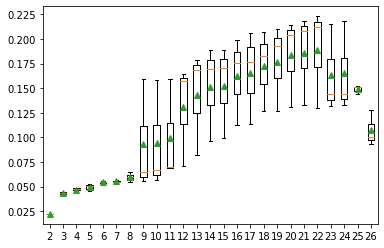

In [ ]:
## RFE for NB using Feature Importance by DT 

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 27):
        rfe = RFE(estimator=DT(random_state=10,class_weight='balanced',criterion='entropy',max_depth=8), n_features_to_select=i)
        model = NB()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model,X,y):
    cv = KFold(n_splits=3,shuffle=True,random_state=10)
    scores = cross_val_score(model,X,y,scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train_scaled, y_train_scaled)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores,ddof=1)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## choosing 8,10,16,18,25

In [ ]:
#rfe = RFE(DT(random_state=10,class_weight='balanced',criterion='entropy',max_depth=8), 8).fit(X_train_scaled, y_train_scaled)
#print(rfe.support_)

In [ ]:
# create the RFE model and select 8,10,16,18,25 attributes
# save the list of imp attributes in a dictionary called col_dict
col_dict={}

for i in [8,10,16,18,25]:
    rfe = RFE(DT(random_state=10,class_weight='balanced',criterion='entropy',max_depth=8), i).fit(X_train_scaled, y_train_scaled)

    col_dict[i]=list(X_test_scaled.columns[rfe.support_])

In [ ]:
col_dict

In [ ]:
## List of Features obtained in the col_dict

feat_8 = ['loan_amnt','int_rate','annual_inc','dti','tot_cur_bal','total_rev_hi_lim','initial_list_status_w','sub_grade']

feat_10= ['loan_amnt','int_rate','annual_inc','dti','revol_bal','revol_util','tot_cur_bal','total_rev_hi_lim',
          'initial_list_status_w','sub_grade']

feat_16= ['loan_amnt','int_rate','annual_inc','dti','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util',
          'total_acc','tot_cur_bal','total_rev_hi_lim','term_ 60 months','initial_list_status_w','grade','sub_grade']

feat_18= ['loan_amnt','int_rate','annual_inc','dti','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util',
          'total_acc','tot_coll_amt','tot_cur_bal','total_rev_hi_lim','term_ 60 months','verification_status_Verified',
          'initial_list_status_w','grade','sub_grade']
 
feat_25= ['loan_amnt','int_rate','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util',
          'total_acc','tot_coll_amt','tot_cur_bal','total_rev_hi_lim','term_ 60 months','home_ownership_MORTGAGE',
          'home_ownership_OTHER','home_ownership_OWN','home_ownership_RENT','verification_status_Source Verified',
          'verification_status_Verified','initial_list_status_w','grade','sub_grade','emp_length']

feat_LR= ['int_rate','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','home_ownership_MORTGAGE',
          'home_ownership_OWN','home_ownership_RENT','verification_status_Source Verified',
          'verification_status_Verified','initial_list_status_w','grade','sub_grade','emp_length']   ## Vinay's note


In [ ]:
X_train_scaled_8  = X_train_scaled[feat_8]
X_train_scaled_10 = X_train_scaled[feat_10]
X_train_scaled_16 = X_train_scaled[feat_16]
X_train_scaled_18 = X_train_scaled[feat_18]
X_train_scaled_25 = X_train_scaled[feat_25]
X_train_scaled_LR = X_train_scaled[feat_LR]

X_test_scaled_8   = X_test_scaled[feat_8]
X_test_scaled_10  = X_test_scaled[feat_10]
X_test_scaled_16  = X_test_scaled[feat_16]
X_test_scaled_18  = X_test_scaled[feat_18]
X_test_scaled_25  = X_test_scaled[feat_25]
X_test_scaled_LR  = X_test_scaled[feat_LR]


### Fitting NB model on n_features

#### n-feat = 8

In [ ]:
nb8=NB().fit(X_train_scaled_8, y_train_scaled)
print(confusion_matrix(y_test_scaled,nb8.predict(X_test_scaled_8)))
print(classification_report(y_train_scaled,nb8.predict(X_train_scaled_8)))
print(classification_report(y_test_scaled,nb8.predict(X_test_scaled_8)))

[[223531   2971]
 [ 12241    702]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    528457
           1       0.19      0.06      0.09     30357

    accuracy                           0.94    558814
   macro avg       0.57      0.52      0.53    558814
weighted avg       0.91      0.94      0.92    558814

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    226502
           1       0.19      0.05      0.08     12943

    accuracy                           0.94    239445
   macro avg       0.57      0.52      0.53    239445
weighted avg       0.91      0.94      0.92    239445



In [ ]:
## NB8 tuning:

params = {'var_smoothing': np.logspace(0,-9, num=100)}
kf=KFold(n_splits=3,shuffle=True,random_state=10)

grid_nb8 = GridSearchCV(NB(), params, cv=kf, n_jobs=-1, scoring='recall').fit(X_train_scaled_8, y_train_scaled)
grid_nb8.best_params_

{'var_smoothing': 1.873817422860383e-06}

In [ ]:
nb8_tuned=NB(var_smoothing=1.873817422860383e-06).fit(X_train_scaled_8, y_train_scaled)
print(confusion_matrix(y_test_scaled,nb8_tuned.predict(X_test_scaled_8)))
print(classification_report(y_train_scaled,nb8_tuned.predict(X_train_scaled_8)))
print(classification_report(y_test_scaled,nb8_tuned.predict(X_test_scaled_8)))

[[223533   2969]
 [ 12241    702]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    528457
           1       0.19      0.06      0.09     30357

    accuracy                           0.94    558814
   macro avg       0.57      0.52      0.53    558814
weighted avg       0.91      0.94      0.92    558814

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    226502
           1       0.19      0.05      0.08     12943

    accuracy                           0.94    239445
   macro avg       0.57      0.52      0.53    239445
weighted avg       0.91      0.94      0.92    239445



In [ ]:
y_test_proba = nb8_tuned.predict_proba(X_test_scaled_8)[:,1]
print('ROC AUC :',roc_auc_score(y_test_scaled,y_test_proba))

ROC AUC : 0.7150855014990019


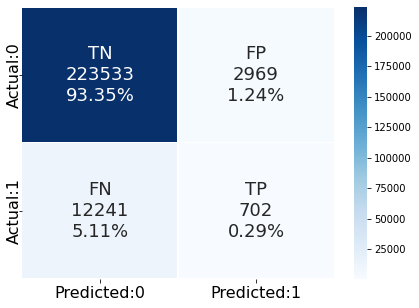

In [ ]:
y_pred=nb8_tuned.predict(X_test_scaled_8)
plot_confusion_matrix(y_test_scaled,y_pred)

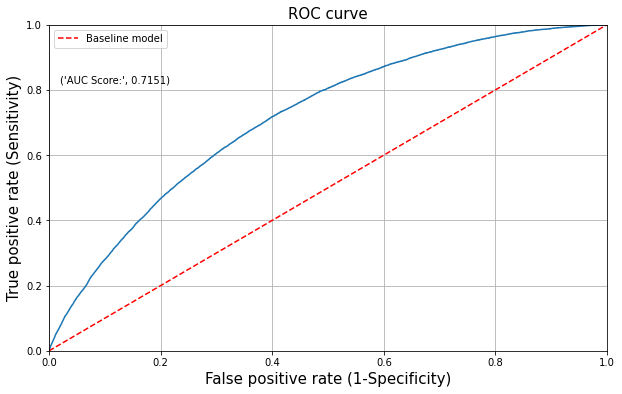

In [ ]:
get_roc_curve(y_test_scaled,y_test_proba)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_scaled,y_test_proba)
youdens_table = pd.DataFrame({'TPR': tpr,'FPR': fpr,'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.716526,0.398548,0.047686,0.317978
1,0.715676,0.397714,0.047846,0.317962
2,0.715599,0.397670,0.047854,0.317929
3,0.716758,0.398831,0.047630,0.317927
4,0.715445,0.397520,0.047882,0.317925


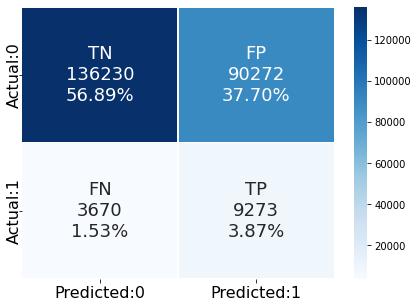

In [ ]:
y_pred_youden = [ 0 if x < 0.047686 else 1 for x in y_test_proba]
plot_confusion_matrix(y_test_scaled,y_pred_youden)

In [ ]:
print(classification_report(y_test_scaled,y_pred_youden))

              precision    recall  f1-score   support

           0       0.97      0.60      0.74    226502
           1       0.09      0.72      0.16     12943

    accuracy                           0.61    239445
   macro avg       0.53      0.66      0.45    239445
weighted avg       0.93      0.61      0.71    239445



#### n-feat = 16

In [ ]:
nb16=NB().fit(X_train_scaled_16, y_train_scaled)
print(confusion_matrix(y_test_scaled,nb16.predict(X_test_scaled_16)))
print(classification_report(y_train_scaled,nb16.predict(X_train_scaled_16)))
print(classification_report(y_test_scaled,nb16.predict(X_test_scaled_16)))

[[213035  13467]
 [ 10481   2462]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95    528457
           1       0.15      0.19      0.17     30357

    accuracy                           0.90    558814
   macro avg       0.55      0.56      0.56    558814
weighted avg       0.91      0.90      0.90    558814

              precision    recall  f1-score   support

           0       0.95      0.94      0.95    226502
           1       0.15      0.19      0.17     12943

    accuracy                           0.90    239445
   macro avg       0.55      0.57      0.56    239445
weighted avg       0.91      0.90      0.90    239445



In [ ]:
## NB16 tuning:

params = {'var_smoothing': np.logspace(0,-9, num=100)}
kf=KFold(n_splits=3,shuffle=True,random_state=10)

grid_nb16 = GridSearchCV(NB(), params, cv=kf, n_jobs=-1, scoring='recall').fit(X_train_scaled_16, y_train_scaled)

In [ ]:
grid_nb16.best_params_

{'var_smoothing': 2.310129700083158e-06}

In [ ]:
# Tuned model
nb16_tuned= grid_nb16.best_estimator_
print(confusion_matrix(y_test_scaled,nb16_tuned.predict(X_test_scaled_16)))
print(classification_report(y_train_scaled,nb16_tuned.predict(X_train_scaled_16)))
print(classification_report(y_test_scaled,nb16_tuned.predict(X_test_scaled_16)))

[[213037  13465]
 [ 10482   2461]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95    528457
           1       0.15      0.19      0.17     30357

    accuracy                           0.90    558814
   macro avg       0.55      0.56      0.56    558814
weighted avg       0.91      0.90      0.90    558814

              precision    recall  f1-score   support

           0       0.95      0.94      0.95    226502
           1       0.15      0.19      0.17     12943

    accuracy                           0.90    239445
   macro avg       0.55      0.57      0.56    239445
weighted avg       0.91      0.90      0.90    239445



In [ ]:
y_test_proba = nb16_tuned.predict_proba(X_test_scaled_16)[:,1]
print('ROC AUC :',roc_auc_score(y_test_scaled,y_test_proba))

ROC AUC : 0.7096194362448336


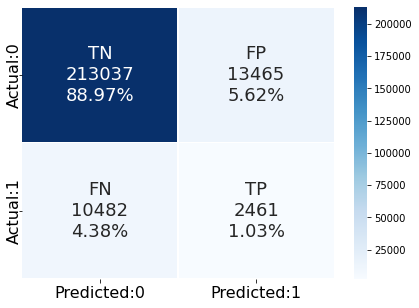

In [ ]:
y_pred=nb16_tuned.predict(X_test_scaled_16)
plot_confusion_matrix(y_test_scaled,y_pred)

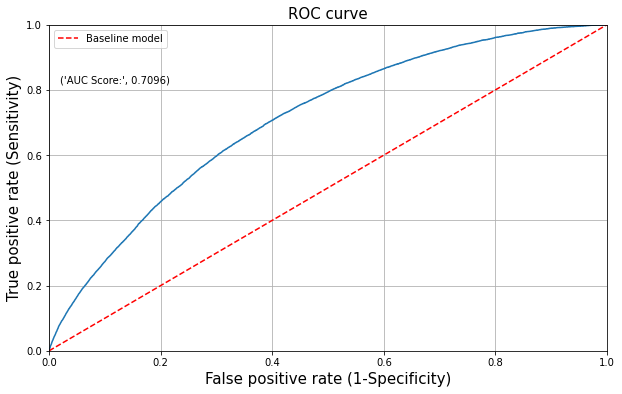

In [ ]:
get_roc_curve(y_test_scaled,y_test_proba)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_scaled,y_test_proba)
youdens_table = pd.DataFrame({'TPR': tpr,'FPR': fpr,'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.695511,0.387922,0.042485,0.307590
1,0.695588,0.388001,0.042470,0.307587
2,0.695743,0.388169,0.042437,0.307574
3,0.695975,0.388407,0.042393,0.307567
4,0.695434,0.387877,0.042500,0.307556


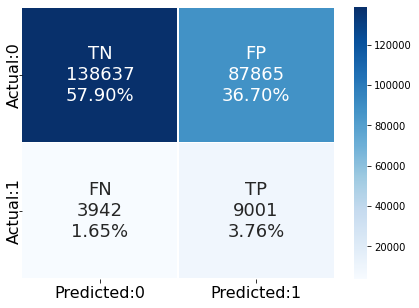

In [ ]:
y_pred_youden = [ 0 if x < 0.042485	 else 1 for x in y_test_proba]
plot_confusion_matrix(y_test_scaled,y_pred_youden)

In [ ]:
print(classification_report(y_test_scaled,y_pred_youden))

              precision    recall  f1-score   support

           0       0.97      0.61      0.75    226502
           1       0.09      0.70      0.16     12943

    accuracy                           0.62    239445
   macro avg       0.53      0.65      0.46    239445
weighted avg       0.92      0.62      0.72    239445



#### n-feat = 18

In [ ]:
nb18=NB().fit(X_train_scaled_18, y_train_scaled)
print(confusion_matrix(y_test_scaled,nb18.predict(X_test_scaled_18)))
print(classification_report(y_train_scaled,nb18.predict(X_train_scaled_18)))
print(classification_report(y_test_scaled,nb18.predict(X_test_scaled_18)))

[[211607  14895]
 [ 10262   2681]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94    528457
           1       0.15      0.21      0.18     30357

    accuracy                           0.89    558814
   macro avg       0.55      0.57      0.56    558814
weighted avg       0.91      0.89      0.90    558814

              precision    recall  f1-score   support

           0       0.95      0.93      0.94    226502
           1       0.15      0.21      0.18     12943

    accuracy                           0.89    239445
   macro avg       0.55      0.57      0.56    239445
weighted avg       0.91      0.89      0.90    239445



In [ ]:
## NB18 tuning:

params = {'var_smoothing': np.logspace(0,-9, num=100)}
kf=KFold(n_splits=3,shuffle=True,random_state=10)

grid_nb18 = GridSearchCV(NB(), params, cv=kf, n_jobs=-1, scoring='recall').fit(X_train_scaled_18, y_train_scaled)

In [ ]:
grid_nb18.best_params_

{'var_smoothing': 2.310129700083158e-07}

In [ ]:
# Tuned Model
nb18_tuned= grid_nb18.best_estimator_
print(confusion_matrix(y_test_scaled,nb18_tuned.predict(X_test_scaled_18)))
print(classification_report(y_train_scaled,nb18_tuned.predict(X_train_scaled_18)))
print(classification_report(y_test_scaled,nb18_tuned.predict(X_test_scaled_18)))

[[211608  14894]
 [ 10262   2681]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94    528457
           1       0.15      0.21      0.18     30357

    accuracy                           0.89    558814
   macro avg       0.55      0.57      0.56    558814
weighted avg       0.91      0.89      0.90    558814

              precision    recall  f1-score   support

           0       0.95      0.93      0.94    226502
           1       0.15      0.21      0.18     12943

    accuracy                           0.89    239445
   macro avg       0.55      0.57      0.56    239445
weighted avg       0.91      0.89      0.90    239445



In [ ]:
y_test_proba = nb18_tuned.predict_proba(X_test_scaled_18)[:,1]
print('ROC AUC :',roc_auc_score(y_test_scaled,y_test_proba))

ROC AUC : 0.7134568773886221


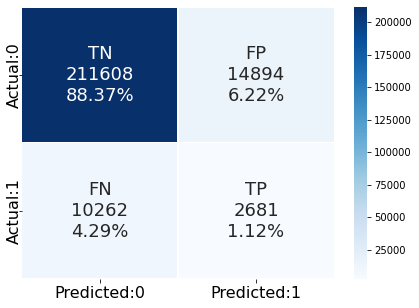

In [ ]:
y_pred=nb18_tuned.predict(X_test_scaled_18)
plot_confusion_matrix(y_test_scaled,y_pred)

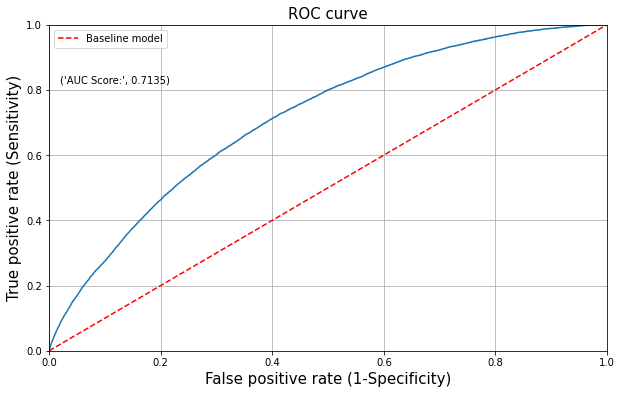

In [ ]:
get_roc_curve(y_test_scaled,y_test_proba)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_scaled,y_test_proba)
youdens_table = pd.DataFrame({'TPR': tpr,'FPR': fpr,'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.725798,0.413087,0.035220,0.312711
1,0.725952,0.413246,0.035186,0.312706
2,0.726030,0.413343,0.035168,0.312687
3,0.725875,0.413202,0.035193,0.312673
4,0.725720,0.413052,0.035226,0.312669


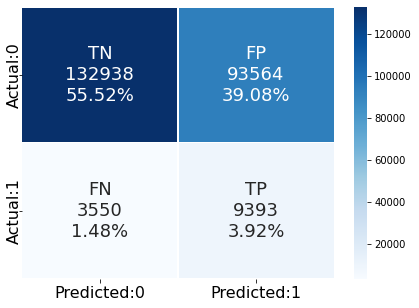

In [ ]:
y_pred_youden = [ 0 if x < 0.035220	 else 1 for x in y_test_proba]
plot_confusion_matrix(y_test_scaled,y_pred_youden)

In [ ]:
print(classification_report(y_test_scaled,y_pred_youden))

              precision    recall  f1-score   support

           0       0.97      0.59      0.73    226502
           1       0.09      0.73      0.16     12943

    accuracy                           0.59    239445
   macro avg       0.53      0.66      0.45    239445
weighted avg       0.93      0.59      0.70    239445



#### n-feat = 25

In [ ]:
nb25=NB().fit(X_train_scaled_25, y_train_scaled)
print(confusion_matrix(y_test_scaled,nb25.predict(X_test_scaled_25)))
print(classification_report(y_train_scaled,nb25.predict(X_train_scaled_25)))
print(classification_report(y_test_scaled,nb25.predict(X_test_scaled_25)))

[[217468   9034]
 [ 11071   1872]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96    528457
           1       0.17      0.15      0.16     30357

    accuracy                           0.91    558814
   macro avg       0.56      0.55      0.56    558814
weighted avg       0.91      0.91      0.91    558814

              precision    recall  f1-score   support

           0       0.95      0.96      0.96    226502
           1       0.17      0.14      0.16     12943

    accuracy                           0.92    239445
   macro avg       0.56      0.55      0.56    239445
weighted avg       0.91      0.92      0.91    239445



In [ ]:
## NB25 tuning:

params = {'var_smoothing': np.logspace(0,-9, num=100)}
kf=KFold(n_splits=3,shuffle=True,random_state=10)

grid_nb25 = GridSearchCV(NB(), params, cv=kf, n_jobs=-1, scoring='recall').fit(X_train_scaled_25, y_train_scaled)

In [ ]:
grid_nb25.best_params_

{'var_smoothing': 0.0001873817422860383}

In [ ]:
# Tuned model
nb25_tuned= NB(var_smoothing= 0.0001873817422860383).fit(X_train_scaled_25, y_train_scaled)
print(confusion_matrix(y_test_scaled,nb25_tuned.predict(X_test_scaled_25)))
print(classification_report(y_train_scaled,nb25_tuned.predict(X_train_scaled_25)))
print(classification_report(y_test_scaled,nb25_tuned.predict(X_test_scaled_25)))

[[211222  15280]
 [ 10204   2739]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94    528457
           1       0.15      0.22      0.18     30357

    accuracy                           0.89    558814
   macro avg       0.55      0.57      0.56    558814
weighted avg       0.91      0.89      0.90    558814

              precision    recall  f1-score   support

           0       0.95      0.93      0.94    226502
           1       0.15      0.21      0.18     12943

    accuracy                           0.89    239445
   macro avg       0.55      0.57      0.56    239445
weighted avg       0.91      0.89      0.90    239445



In [ ]:
y_test_proba = nb25_tuned.predict_proba(X_test_scaled_25)[:,1]
print('ROC AUC :',roc_auc_score(y_test_scaled,y_test_proba))

ROC AUC : 0.7150402075287785


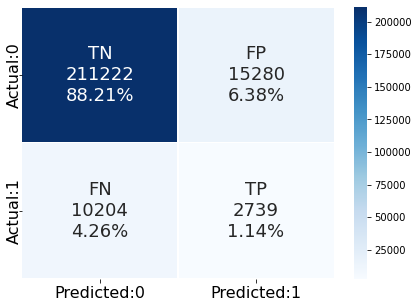

In [ ]:
y_pred=nb25_tuned.predict(X_test_scaled_25)
plot_confusion_matrix(y_test_scaled,y_pred)

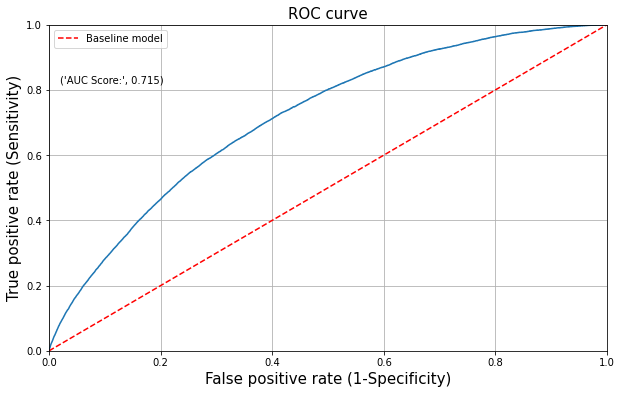

In [ ]:
get_roc_curve(y_test_scaled,y_test_proba)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_scaled,y_test_proba)
youdens_table = pd.DataFrame({'TPR': tpr,'FPR': fpr,'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.728888,0.415577,0.034032,0.313311
1,0.728811,0.415559,0.034037,0.313252
2,0.728811,0.415577,0.034033,0.313234
3,0.728965,0.415749,0.034001,0.313216
4,0.728734,0.415555,0.034037,0.313179


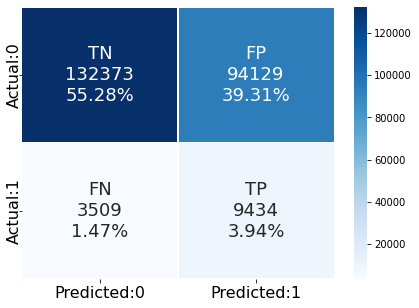

In [ ]:
y_pred_youden = [ 0 if x < 0.034032	 else 1 for x in y_test_proba]
plot_confusion_matrix(y_test_scaled,y_pred_youden)

In [ ]:
print(classification_report(y_test_scaled,y_pred_youden))

              precision    recall  f1-score   support

           0       0.97      0.58      0.73    226502
           1       0.09      0.73      0.16     12943

    accuracy                           0.59    239445
   macro avg       0.53      0.66      0.45    239445
weighted avg       0.93      0.59      0.70    239445



#### n-feat = LR

In [ ]:
nbLR=NB().fit(X_train_scaled_LR, y_train_scaled)
print(confusion_matrix(y_test_scaled,nbLR.predict(X_test_scaled_LR)))
print(classification_report(y_train_scaled,nbLR.predict(X_train_scaled_LR)))
print(classification_report(y_test_scaled,nbLR.predict(X_test_scaled_LR)))

[[214557  11945]
 [ 10732   2211]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    528457
           1       0.15      0.17      0.16     30357

    accuracy                           0.90    558814
   macro avg       0.55      0.56      0.56    558814
weighted avg       0.91      0.90      0.91    558814

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    226502
           1       0.16      0.17      0.16     12943

    accuracy                           0.91    239445
   macro avg       0.55      0.56      0.56    239445
weighted avg       0.91      0.91      0.91    239445



In [ ]:
## NBLR tuning:
params = {'var_smoothing': np.logspace(0,-9, num=100)}
kf=KFold(n_splits=3,shuffle=True,random_state=10)

grid_nblr = GridSearchCV(NB(), params, cv=kf, n_jobs=-1, scoring='recall').fit(X_train_scaled_LR, y_train_scaled)

In [ ]:
grid_nblr.best_params_

{'var_smoothing': 8.111308307896873e-06}

In [ ]:
nblr_tuned= NB(var_smoothing = 8.111308307896873e-06).fit(X_train_scaled_LR, y_train_scaled)
print(confusion_matrix(y_test_scaled,nblr_tuned.predict(X_test_scaled_LR)))
print(classification_report(y_train_scaled,nblr_tuned.predict(X_train_scaled_LR)))
print(classification_report(y_test_scaled,nblr_tuned.predict(X_test_scaled_LR)))

[[214561  11941]
 [ 10733   2210]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    528457
           1       0.15      0.17      0.16     30357

    accuracy                           0.90    558814
   macro avg       0.55      0.56      0.56    558814
weighted avg       0.91      0.90      0.91    558814

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    226502
           1       0.16      0.17      0.16     12943

    accuracy                           0.91    239445
   macro avg       0.55      0.56      0.56    239445
weighted avg       0.91      0.91      0.91    239445



In [ ]:
y_test_proba = nblr_tuned.predict_proba(X_test_scaled_LR)[:,1]
print('ROC AUC :',roc_auc_score(y_test_scaled,y_test_proba))

ROC AUC : 0.7105652948022834


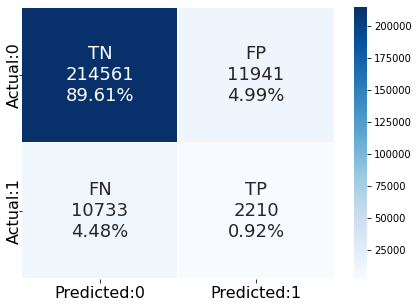

In [ ]:
y_pred=nblr_tuned.predict(X_test_scaled_LR)
plot_confusion_matrix(y_test_scaled,y_pred)

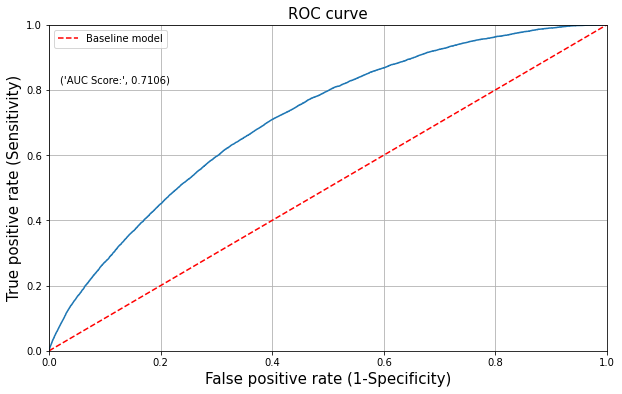

In [ ]:
get_roc_curve(y_test_scaled,y_test_proba)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_scaled,y_test_proba)
youdens_table = pd.DataFrame({'TPR': tpr,'FPR': fpr,'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.708182,0.398588,0.037436,0.309594
1,0.708491,0.398910,0.037383,0.309581
2,0.708182,0.398610,0.037435,0.309572
3,0.707873,0.398306,0.037478,0.309567
4,0.708182,0.398619,0.037433,0.309563


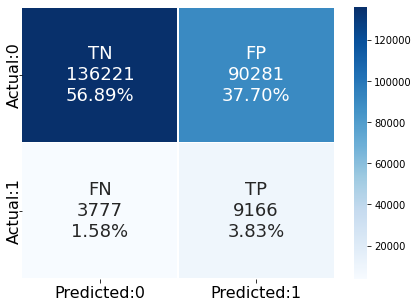

In [ ]:
y_pred_youden = [ 0 if x < 0.037436	 else 1 for x in y_test_proba]
plot_confusion_matrix(y_test_scaled,y_pred_youden)

In [ ]:
print(classification_report(y_test_scaled,y_pred_youden))

              precision    recall  f1-score   support

           0       0.97      0.60      0.74    226502
           1       0.09      0.71      0.16     12943

    accuracy                           0.61    239445
   macro avg       0.53      0.65      0.45    239445
weighted avg       0.93      0.61      0.71    239445



### Permutation_Importance

`"The classifier does not expose "coef_" or "feature_importances_" attributes"`

Almost all the algorithms in machine learning assign score to the features. The coefficients calculated for each feature as part of learning process can be used to score the features which can be accessed through either coef_ method or feature_importances_  method. 

The naive bayes classifers don't offer an intrinsic method to evaluate feature importances. Naïve Bayes methods work by determining the conditional and unconditional probabilities associated with the features and predict the class with the highest probability. Thus, there are no coefficients computed or associated with the features you used to train the model (compare with its documentation).

That being said, there are methods that you can apply post-hoc to analyze the model after it has been trained. One of these methods is the Permutation Importance and it, conveniently, has also been implemented in scikit-learn.

In [ ]:
## Feature Selection for NB

from sklearn.inspection import permutation_importance

nb1=NB().fit(X_train_scaled, y_train_scaled)

imps = permutation_importance(nb1, X_test_scaled, y_test_scaled)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test_scaled.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_test_scaled.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. pub_rec (0.000316)
2. loan_amnt (0.000063)
3. home_ownership_OTHER (0.000051)
4. home_ownership_OWN (0.000026)
5. home_ownership_NONE (0.000013)
6. delinq_2yrs (-0.000013)
7. open_acc (-0.000089)
8. emp_length (-0.000113)
9. dti (-0.000124)
10. revol_bal (-0.000225)
11. tot_coll_amt (-0.000278)
12. total_acc (-0.000357)
13. verification_status_Source Verified (-0.000377)
14. home_ownership_MORTGAGE (-0.000653)
15. initial_list_status_w (-0.000730)
16. annual_inc (-0.000779)
17. tot_cur_bal (-0.000952)
18. home_ownership_RENT (-0.000955)
19. total_rev_hi_lim (-0.000968)
20. inq_last_6mths (-0.001122)
21. revol_util (-0.001174)
22. term_ 60 months (-0.001858)
23. verification_status_Verified (-0.002041)
24. int_rate (-0.011715)
25. grade (-0.013048)
26. sub_grade (-0.013216)


In [ ]:
feat_imp_nb = pd.DataFrame([X_test_scaled.columns,importances],index=['Feature','Importance']).T.sort_values(by='Importance',ascending=False).reset_index(drop=True)

In [ ]:
feat_imp_nb

,Feature,Importance
0,pub_rec,0.00031573
1,loan_amnt,6.34801e-05
2,home_ownership_OTHER,5.09512e-05
3,home_ownership_OWN,2.58932e-05
4,home_ownership_NONE,1.33642e-05
5,delinq_2yrs,-1.33642e-05
6,open_acc,-8.93733e-05
7,emp_length,-0.000112761
8,dti,-0.000124454
9,revol_bal,-0.000224686


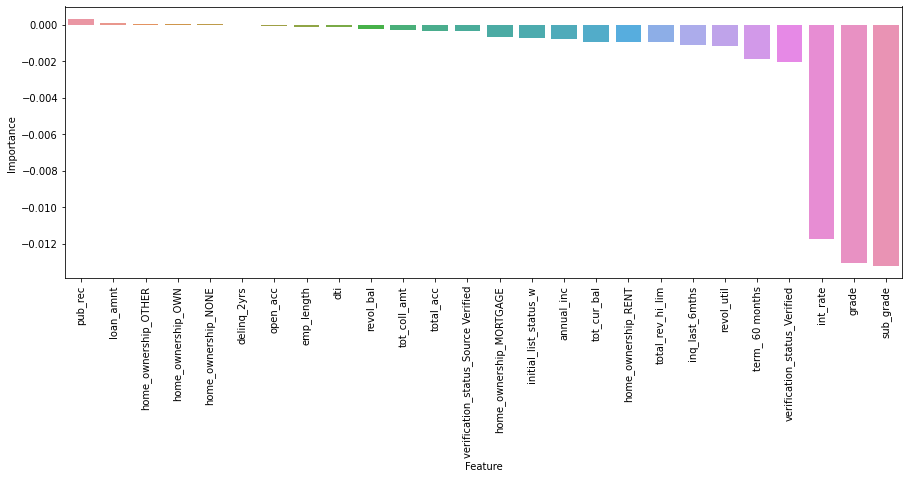

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Feature",y="Importance",data=feat_imp_nb)
plt.xticks(rotation=90)
plt.show()

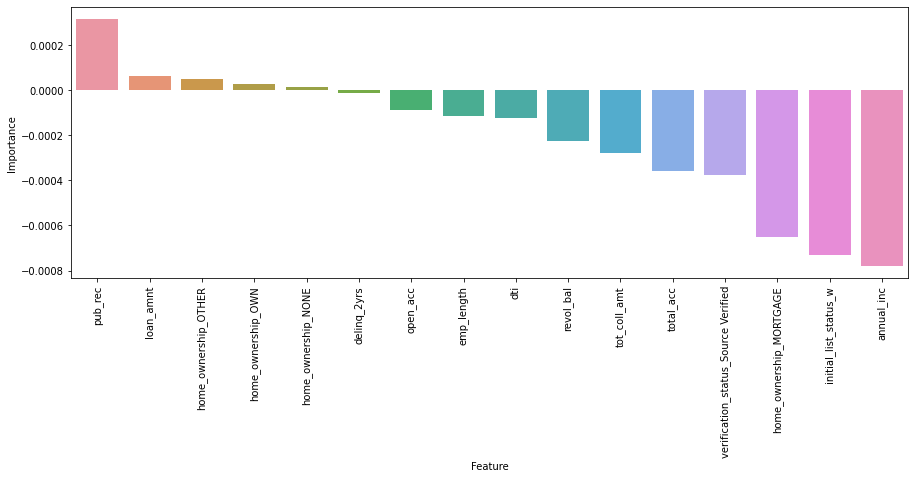

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Feature",y="Importance",data=feat_imp_nb.iloc[:16,:])
plt.xticks(rotation=90)
plt.show()

# **BOOSTING**

## **Ada Boost**

In [ ]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(base_estimator=decision_tree, random_state = 10,learning_rate=0.3,n_estimators=10)

# fit the model using fit() on train data
ada_model.fit(X_train_dt, y_train_dt)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=8,
                                                         random_state=10),
                   learning_rate=0.3, n_estimators=10, random_state=10)

**Calculate performance measures on the train set.**

In [ ]:
y_train_ada_pred =ada_model.predict(X_train_dt)

    
print(classification_report(y_true=y_train_dt,y_pred=y_train_ada_pred))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81    528457
           1       0.13      0.83      0.23     30357

    accuracy                           0.70    558814
   macro avg       0.56      0.76      0.52    558814
weighted avg       0.94      0.70      0.78    558814



**Calculate performance measures on the test set.**

In [ ]:
y_test_ada_pred =ada_model.predict(X_test_dt)

    
print(classification_report(y_true=y_test_dt,y_pred=y_test_ada_pred))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81    226502
           1       0.12      0.78      0.22     12943

    accuracy                           0.69    239445
   macro avg       0.55      0.73      0.51    239445
weighted avg       0.94      0.69      0.78    239445



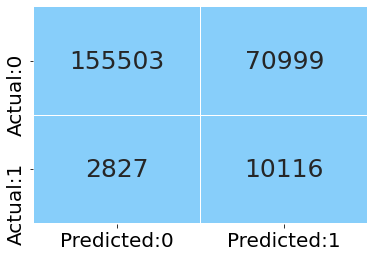

In [ ]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test_dt,y_test_ada_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

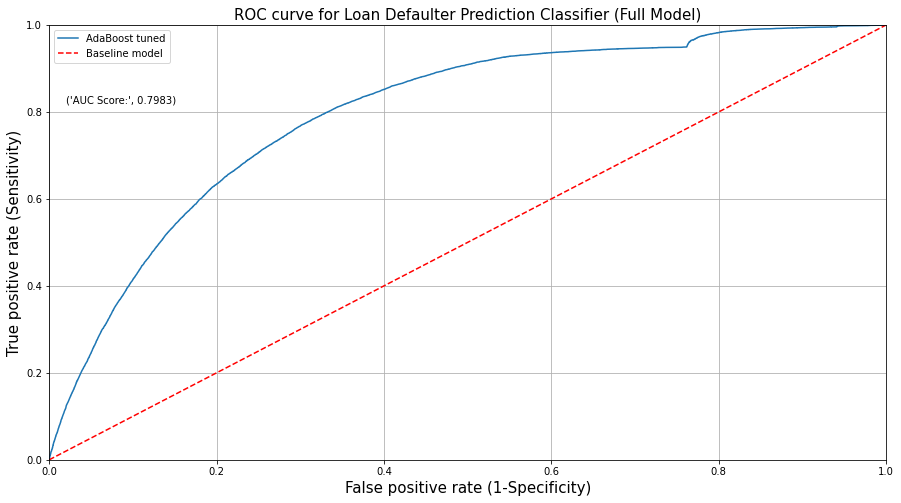

In [ ]:
# Roc curve

plt.figure(figsize=[15,8])

y_test_ada_pred_proba = ada_model.predict_proba(X_test_dt)[:,1]


# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test_dt,y_test_ada_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr,label='AdaBoost tuned')

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--',label='Baseline model')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(metrics.roc_auc_score(y_test_dt,y_test_ada_pred_proba),4)))
                               
# plot the grid
plt.grid(True)

# displaying legends
plt.legend()

plt.show()

In [ ]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.783512,0.314863,0.499566,0.468650
1,0.783435,0.314788,0.499599,0.468648
2,0.783512,0.314871,0.499565,0.468641
3,0.783435,0.314796,0.499588,0.468639
4,0.783512,0.314885,0.499556,0.468628


In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_test_ada_pred_youden = [ 0 if x < 0.499566 else 1 for x in y_test_ada_pred_proba]

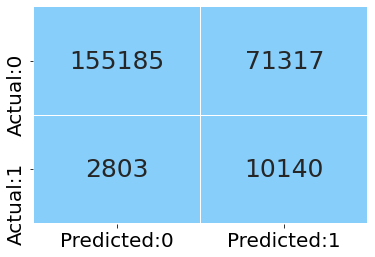

In [ ]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test_dt,y_test_ada_pred_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [ ]:
print(classification_report(y_true=y_test_dt,y_pred=y_test_ada_pred_youden))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81    226502
           1       0.12      0.78      0.21     12943

    accuracy                           0.69    239445
   macro avg       0.55      0.73      0.51    239445
weighted avg       0.94      0.69      0.78    239445



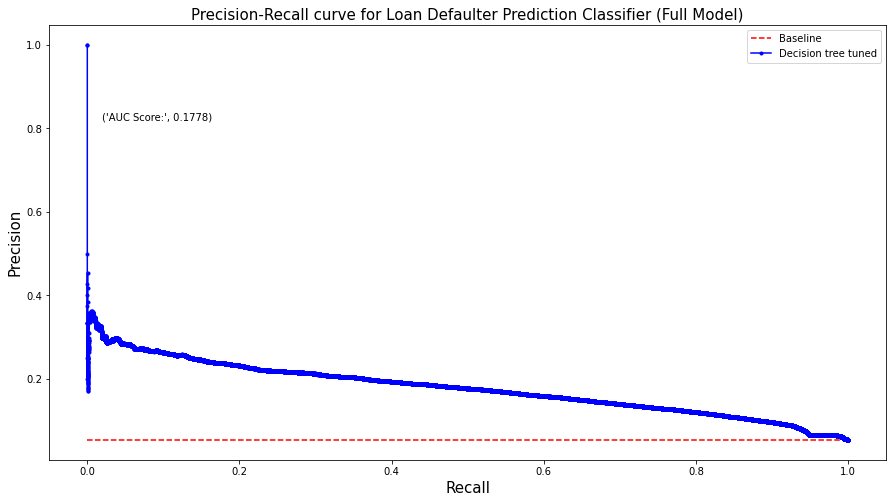

In [ ]:
# precision recall curve

plt.figure(figsize=[15,8])

lr_precision, lr_recall, threshold = precision_recall_curve(y_test_dt,y_test_ada_pred_proba)

lr_f1, lr_auc = f1_score(y_test_dt,y_test_ada_pred), auc(lr_recall, lr_precision)

# summarize scores
#print('Random Forest tuned: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
Baseline = len(y_test_dt[y_test_dt==1]) / len(y_test_dt)

plt.plot([0, 1], [Baseline,Baseline], linestyle='--', label='Baseline',color='r')

plt.plot(lr_recall, lr_precision, marker='.', label='Decision tree tuned',color='b')

#average_precision = average_precision_score(y_test, y_pred_test_proba_GN)

#print('Average precision-recall score:'
#      ,average_precision)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the average precision score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(lr_auc,4)))

# axis labels
plt.title('Precision-Recall curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('Recall',fontsize = 15)
plt.ylabel('Precision',fontsize = 15)

# show the legend
plt.legend()

# show the plot
plt.show()

In [ ]:
ada_model = AdaBoostClassifier(base_estimator=decision_tree, random_state = 10)
params={'n_estimators':[10,20,30,40,50,60,70,80,90,100],'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6]}
kf=KFold(n_splits=3,shuffle=True,random_state=10)
GS1=GridSearchCV(ada_model,params,cv=kf,n_jobs=-1,scoring='recall')
GS1.fit(X_train_dt,y_train_dt)

GridSearchCV(cv=KFold(n_splits=3, random_state=10, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                criterion='entropy',
                                                                                max_depth=8,
                                                                                random_state=10),
                                          random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='recall')

In [ ]:
GS1.best_params_

{'learning_rate': 0.3, 'n_estimators': 10}

In [ ]:
GS1.best_score_

0.7696078136877694

## **XG Boost**

### Tune the Hyperparameters (XG Boost)

In [ ]:
xgb_model =XGBClassifier(max_depth = 8, gamma = 1,random_state=10)
params = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
kf=KFold(n_splits=3,shuffle=True,random_state=10)
GS2=GridSearchCV(xgb_model,params,cv=kf,n_jobs=-1,scoring='recall')
GS2.fit(X_train_dt,y_train_dt)

[07:28:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=3, random_state=10, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=8, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=10,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
               

In [ ]:
GS2.cv_results_

{'mean_fit_time': array([211.99816688, 205.07004102, 200.92206629, 198.15403914,
        196.66430585,  95.02024651]),
 'std_fit_time': array([ 2.10475769,  1.4705517 ,  4.03939766,  1.26035071,  1.84967464,
        70.49973934]),
 'mean_score_time': array([0.5101258 , 0.56831694, 0.6722753 , 0.68439857, 0.53875192,
        0.35223309]),
 'std_score_time': array([0.07432085, 0.03245412, 0.05986586, 0.13887781, 0.14984301,
        0.04259358]),
 'param_learning_rate': masked_array(data=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.1},
  {'learning_rate': 0.2},
  {'learning_rate': 0.3},
  {'learning_rate': 0.4},
  {'learning_rate': 0.5},
  {'learning_rate': 0.6}],
 'split0_test_score': array([0.00019739, 0.00187525, 0.00315831, 0.0069088 , 0.01204106,
        0.01904856]),
 'split1_test_score': array([0.00138326, 0.0022725 , 0.00513783, 0.00741033, 0.013042

### Performance of the final XG Boost model

In [ ]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model = XGBClassifier(max_depth = 8, gamma = 1,random_state=10,learning_rate=0.2)

# fit the model using fit() on train data
xgb_model.fit(X_train_dt, y_train_dt)

[07:31:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Calculate performance measures on the train set.**

In [ ]:
y_train_xgb_pred=xgb_model.predict(X_train_dt)

    
print(classification_report(y_true=y_train_dt,y_pred=y_train_xgb_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97    528457
           1       0.92      0.01      0.02     30357

    accuracy                           0.95    558814
   macro avg       0.93      0.50      0.49    558814
weighted avg       0.94      0.95      0.92    558814



**Calculate performance measures on the test set.**

In [ ]:
y_test_xgb_pred=xgb_model.predict(X_test_dt)

    
print(classification_report(y_true=y_test_dt,y_pred=y_test_xgb_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97    226502
           1       0.53      0.00      0.01     12943

    accuracy                           0.95    239445
   macro avg       0.74      0.50      0.49    239445
weighted avg       0.92      0.95      0.92    239445



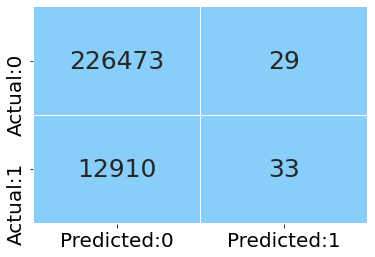

In [ ]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test_dt,y_test_xgb_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

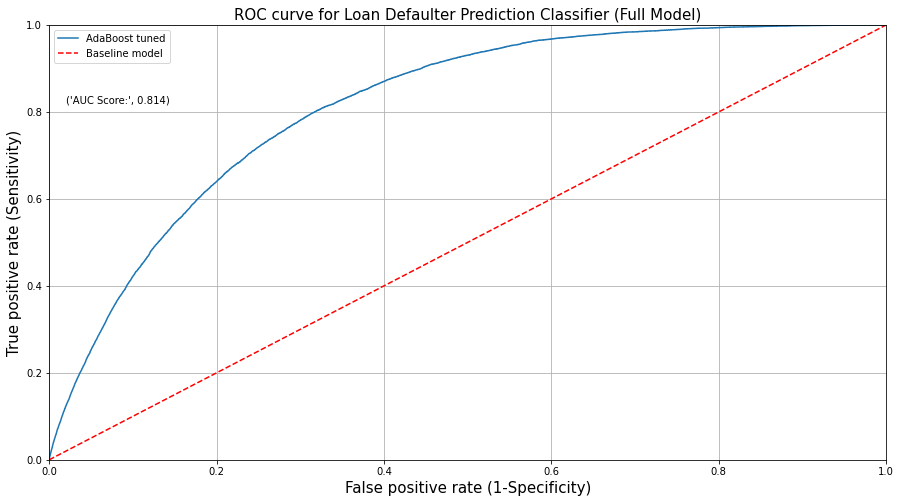

In [ ]:
# Roc curve

plt.figure(figsize=[15,8])

y_test_xgb_pred_proba = xgb_model.predict_proba(X_test_dt)[:,1]


# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test_dt,y_test_xgb_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr,label='AdaBoost tuned')

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--',label='Baseline model')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(metrics.roc_auc_score(y_test_dt,y_test_xgb_pred_proba),4)))
                               
# plot the grid
plt.grid(True)

# displaying legends
plt.legend()

plt.show()

In [ ]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.802673,0.319410,0.052227,0.483263
1,0.802596,0.319388,0.052234,0.483208
2,0.803137,0.319931,0.052125,0.483206
3,0.803291,0.320090,0.052099,0.483201
4,0.796879,0.313693,0.053402,0.483186


In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_test_xgb_pred_youden = [ 0 if x < 0.052227 else 1 for x in y_test_xgb_pred_proba]

In [ ]:
print(classification_report(y_true=y_test_dt,y_pred=y_test_xgb_pred_youden))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80    226502
           1       0.13      0.80      0.22     12943

    accuracy                           0.69    239445
   macro avg       0.55      0.74      0.51    239445
weighted avg       0.94      0.69      0.77    239445



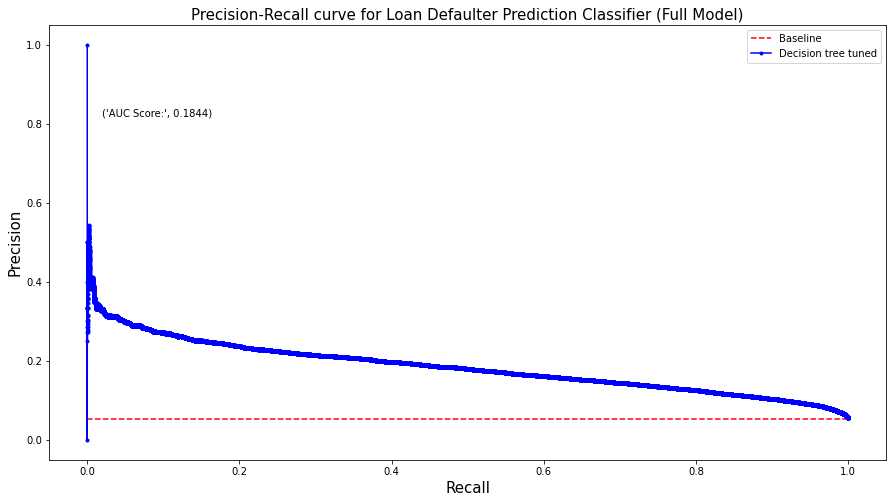

In [ ]:
# precision recall curve

plt.figure(figsize=[15,8])

lr_precision, lr_recall, threshold = precision_recall_curve(y_test_dt,y_test_xgb_pred_proba)

lr_f1, lr_auc = f1_score(y_test_dt,y_test_xgb_pred), auc(lr_recall, lr_precision)

# summarize scores
#print('Random Forest tuned: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
Baseline = len(y_test_dt[y_test_dt==1]) / len(y_test_dt)

plt.plot([0, 1], [Baseline,Baseline], linestyle='--', label='Baseline',color='r')

plt.plot(lr_recall, lr_precision, marker='.', label='Decision tree tuned',color='b')

#average_precision = average_precision_score(y_test, y_pred_test_proba_GN)

#print('Average precision-recall score:'
#      ,average_precision)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the average precision score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(lr_auc,4)))

# axis labels
plt.title('Precision-Recall curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('Recall',fontsize = 15)
plt.ylabel('Precision',fontsize = 15)

# show the legend
plt.legend()

# show the plot
plt.show()

# **STACKING**

In [ ]:
# consider the various algorithms as base learners
base_learners = [('DT_model',DecisionTreeClassifier(random_state = 10,class_weight='balanced',criterion='entropy',max_depth=8)),
                 ('XGB_model',XGBClassifier(max_depth = 8, gamma = 1,random_state=10,learning_rate=0.2)),
                ('lgb_model',lgb.LGBMClassifier(random_state=10,class_weight='balanced', learning_rate= 0.1))]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = lgb.LGBMClassifier(random_state=10,class_weight='balanced', learning_rate= 0.1))

# fit the model on train dataset
stack_model.fit(X_train_dt, y_train_dt)

[08:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:02:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:02:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

StackingClassifier(estimators=[('DT_model',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=8,
                                                       random_state=10)),
                               ('XGB_model',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=1,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=0...
                                              mon

**Calculate performance measures on the train set.**

In [ ]:
y_train_stack_pred=stack_model.predict(X_train_dt)

    
print(classification_report(y_true=y_train_dt,y_pred=y_train_stack_pred))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80    528457
           1       0.13      0.85      0.23     30357

    accuracy                           0.68    558814
   macro avg       0.56      0.76      0.51    558814
weighted avg       0.94      0.68      0.77    558814



**Calculate performance measures on the test set.**

In [ ]:
y_test_stack_pred=stack_model.predict(X_test_dt)

    
print(classification_report(y_true=y_test_dt,y_pred=y_test_stack_pred))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80    226502
           1       0.12      0.82      0.22     12943

    accuracy                           0.68    239445
   macro avg       0.55      0.74      0.51    239445
weighted avg       0.94      0.68      0.77    239445



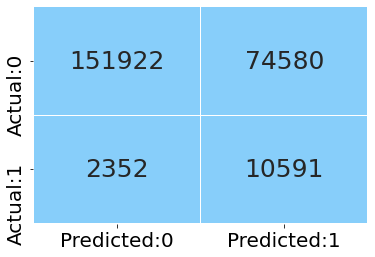

In [ ]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test_dt,y_test_stack_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

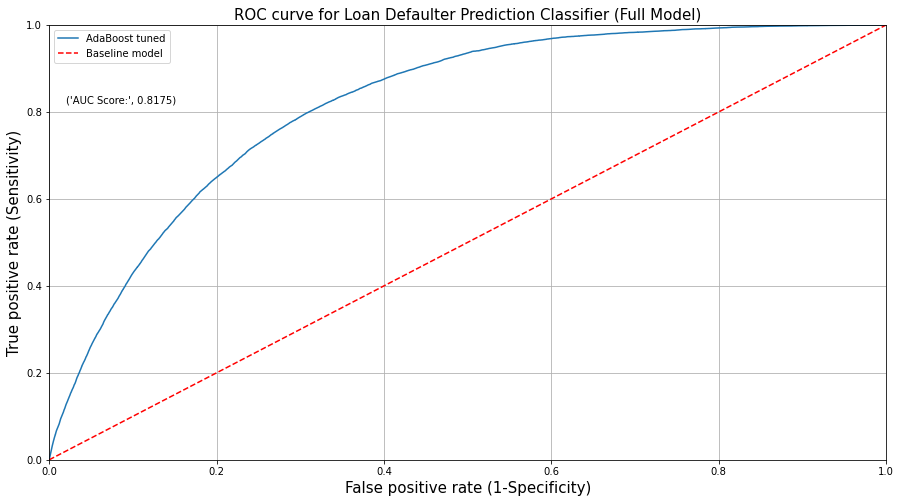

In [ ]:
# Roc curve

plt.figure(figsize=[15,8])

y_test_stack_pred_proba = stack_model.predict_proba(X_test_dt)[:,1]


# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test_dt,y_test_stack_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr,label='AdaBoost tuned')

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--',label='Baseline model')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(metrics.roc_auc_score(y_test_dt,y_test_stack_pred_proba),4)))
                               
# plot the grid
plt.grid(True)

# displaying legends
plt.legend()

plt.show()

In [ ]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.797265,0.307172,0.518999,0.490093
1,0.797497,0.307410,0.518686,0.490087
2,0.797497,0.307415,0.518662,0.490082
3,0.797729,0.307653,0.518184,0.490076
4,0.797419,0.307348,0.518835,0.490071


In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_test_stack_pred_youden = [ 0 if x < 0.518999 else 1 for x in y_test_stack_pred_proba]

In [ ]:
print(classification_report(y_true=y_test_dt,y_pred=y_test_stack_pred_youden))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81    226502
           1       0.13      0.80      0.22     12943

    accuracy                           0.70    239445
   macro avg       0.56      0.75      0.52    239445
weighted avg       0.94      0.70      0.78    239445



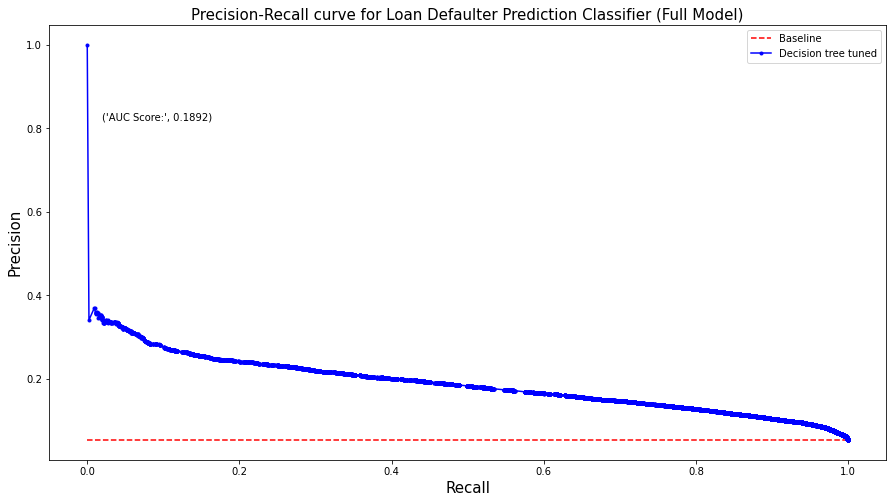

In [ ]:
# precision recall curve

plt.figure(figsize=[15,8])

lr_precision, lr_recall, threshold = precision_recall_curve(y_test_dt,y_test_stack_pred_proba)

lr_f1, lr_auc = f1_score(y_test_dt,y_test_stack_pred), auc(lr_recall, lr_precision)

# summarize scores
#print('Random Forest tuned: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
Baseline = len(y_test_dt[y_test_dt==1]) / len(y_test_dt)

plt.plot([0, 1], [Baseline,Baseline], linestyle='--', label='Baseline',color='r')

plt.plot(lr_recall, lr_precision, marker='.', label='Decision tree tuned',color='b')

#average_precision = average_precision_score(y_test, y_pred_test_proba_GN)

#print('Average precision-recall score:'
#      ,average_precision)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the average precision score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(lr_auc,4)))

# axis labels
plt.title('Precision-Recall curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('Recall',fontsize = 15)
plt.ylabel('Precision',fontsize = 15)

# show the legend
plt.legend()

# show the plot
plt.show()